In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scripts.category_analysis import *
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy import stats

In [2]:
# Load the dataset CMU
all_movies= pd.read_csv("all_movies.csv")

# Load the dataset merge_imdb
adapted = pd.read_csv("adapted_movies.csv")

In [3]:
non_adapted = all_movies[~all_movies['wikipedia_id'].isin(adapted['wikipedia_id'])]

## Category Analysis Evolution

In [4]:
_, adapted_df = analysis_by_category(adapted, '../data/genre_categories.json')
_, non_adapted_df = analysis_by_category(non_adapted, '../data/genre_categories.json')

In [5]:
adapted_df = adapted_df[~adapted_df.index.duplicated(keep='first')]
non_adapted_df = non_adapted_df[~non_adapted_df.index.duplicated(keep='first')]

In [6]:
genre_categories = load_genre_categories('../data/genre_categories.json')

In [7]:
evolution_adapt = category_evolution(adapted_df)
evolution_non_adapt = category_evolution(non_adapted_df)

/tmp/ipykernel_9824/1572488999.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 7))


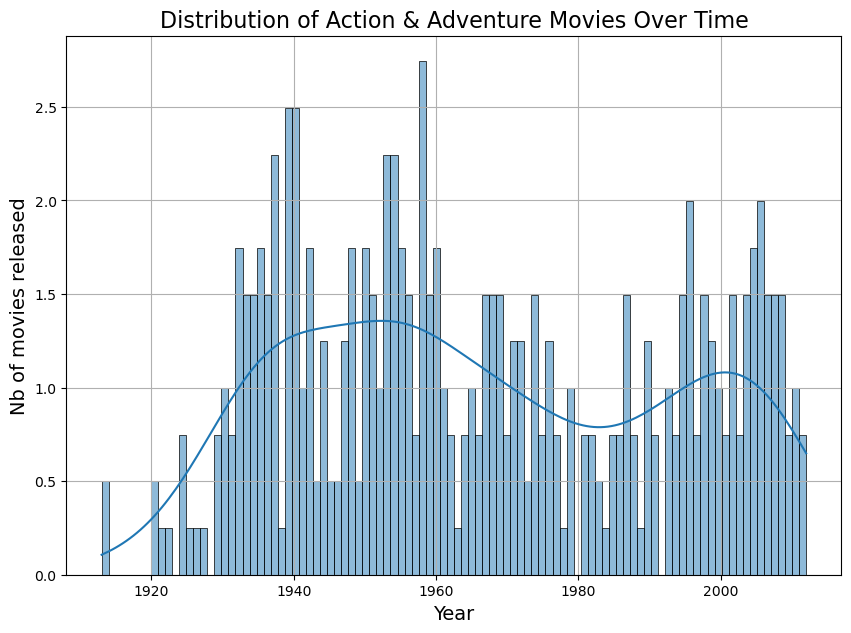

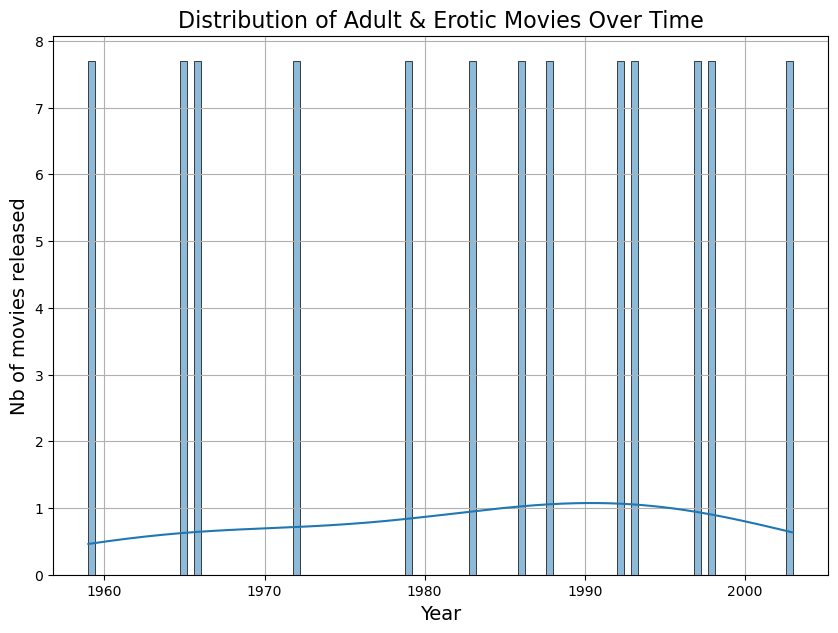

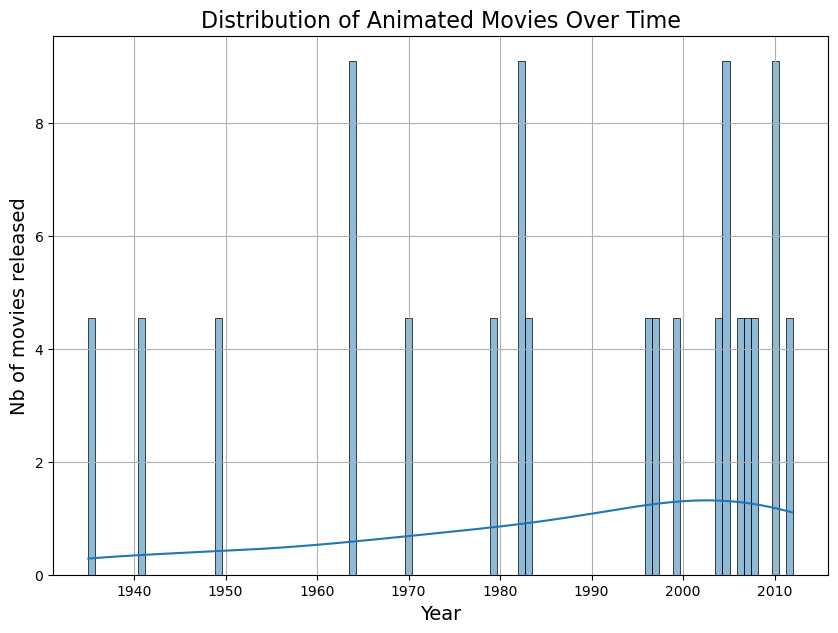

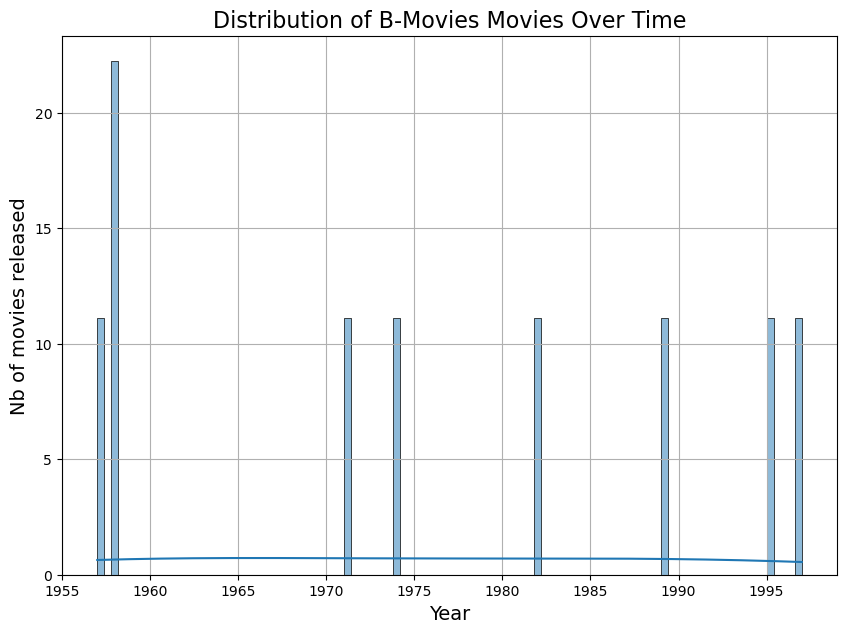

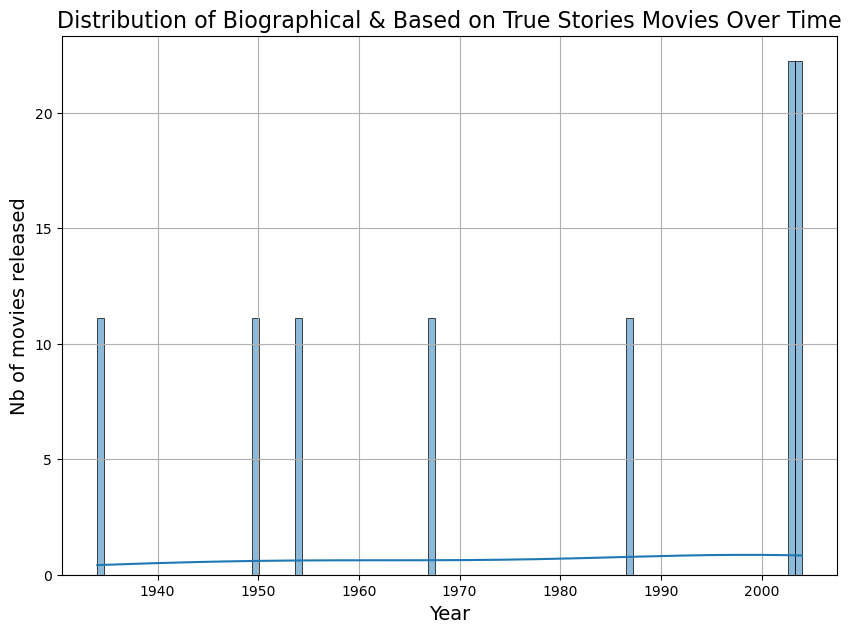

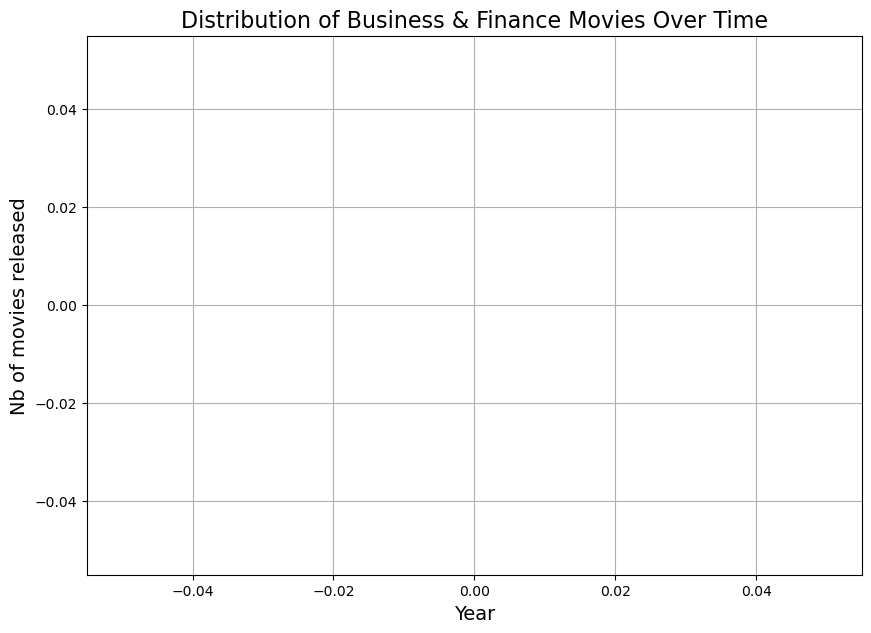

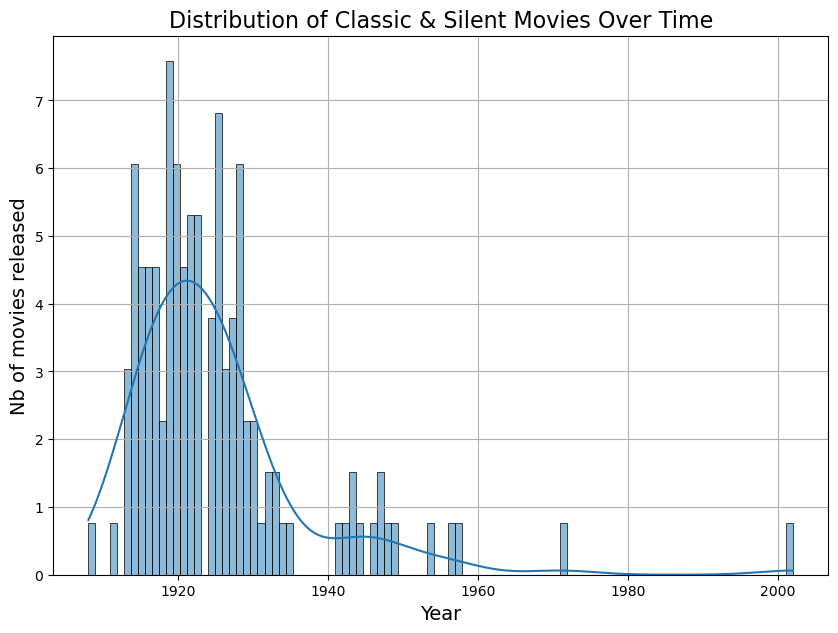

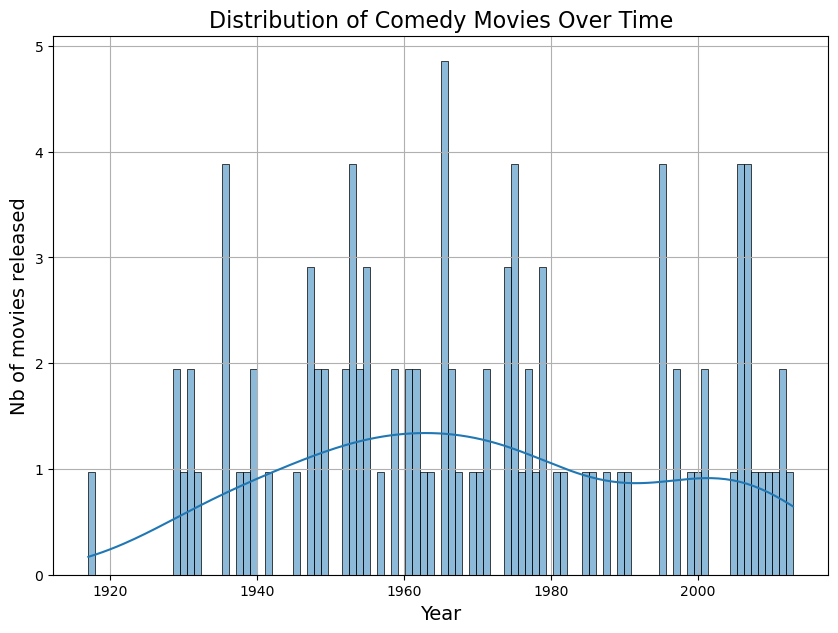

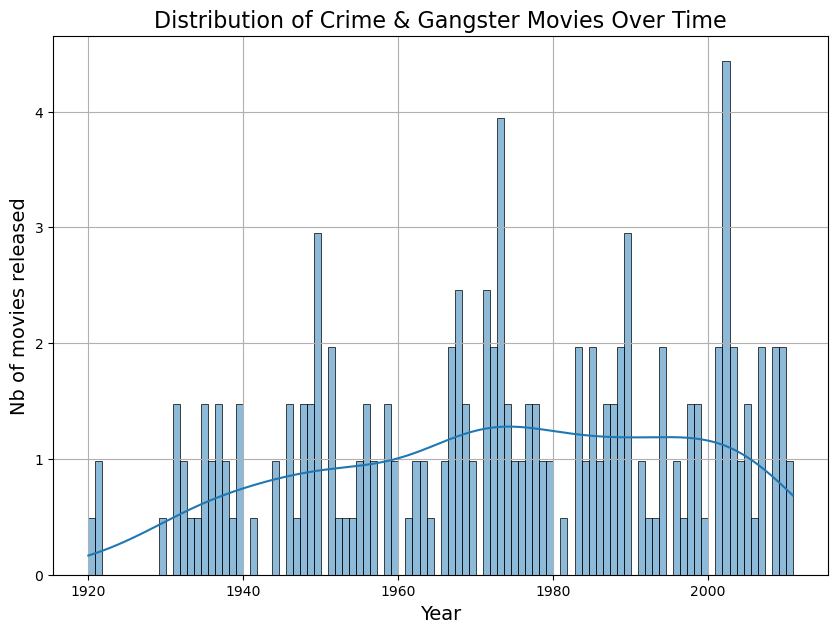

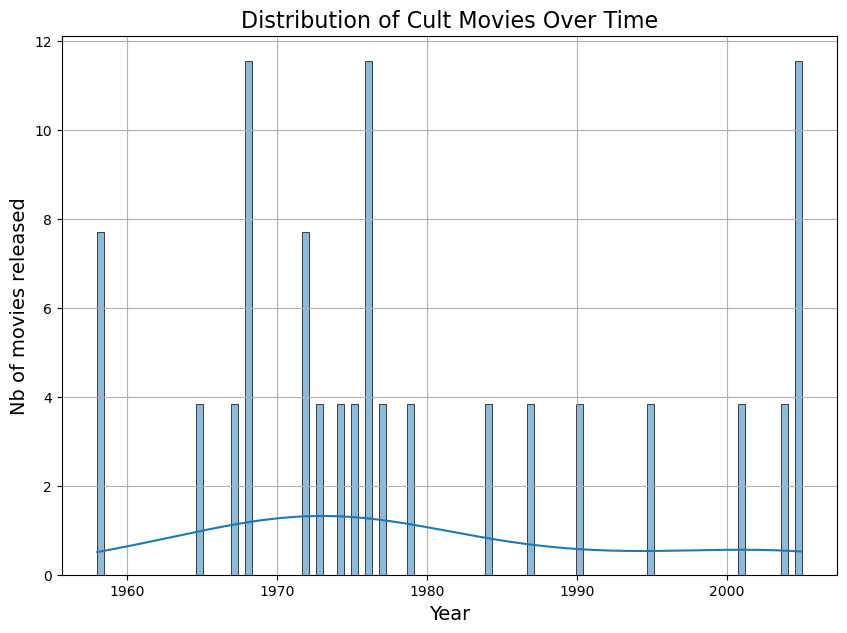

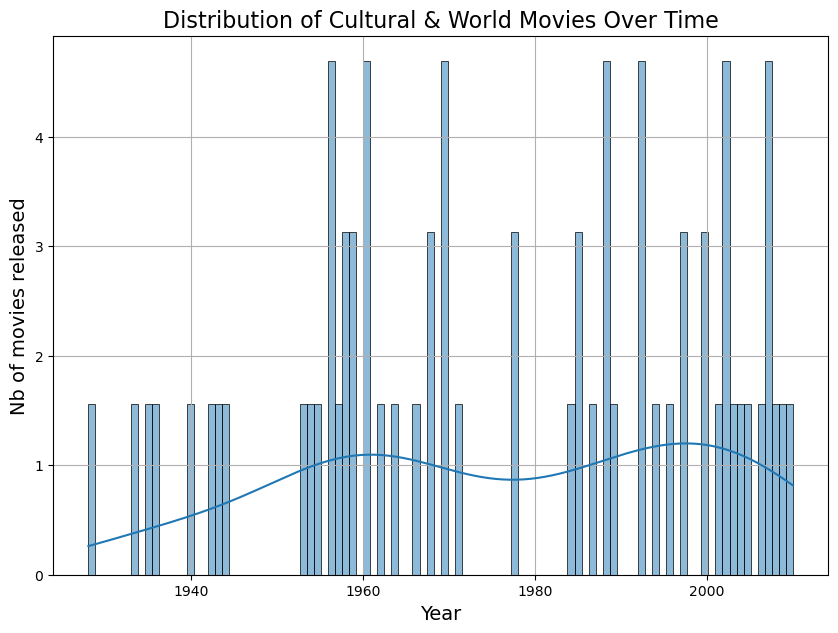

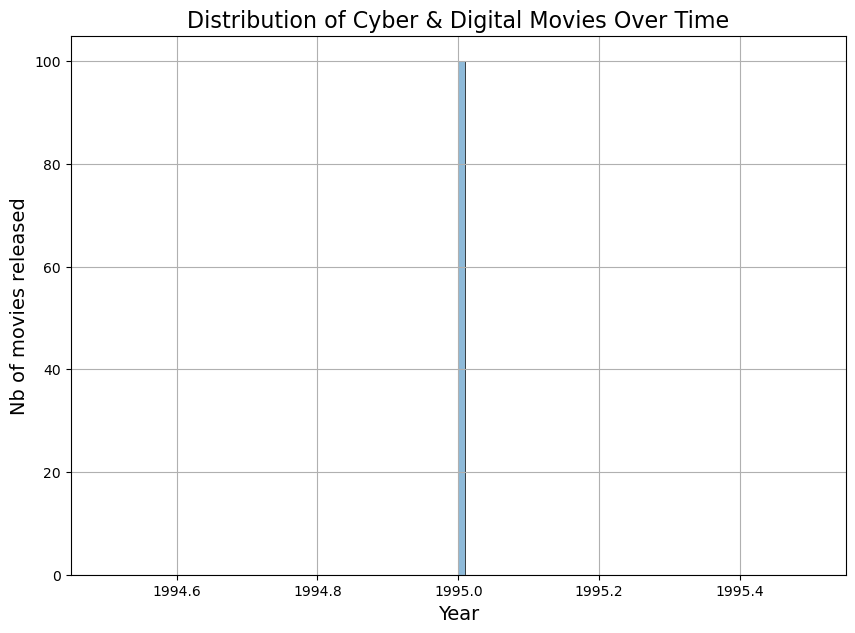

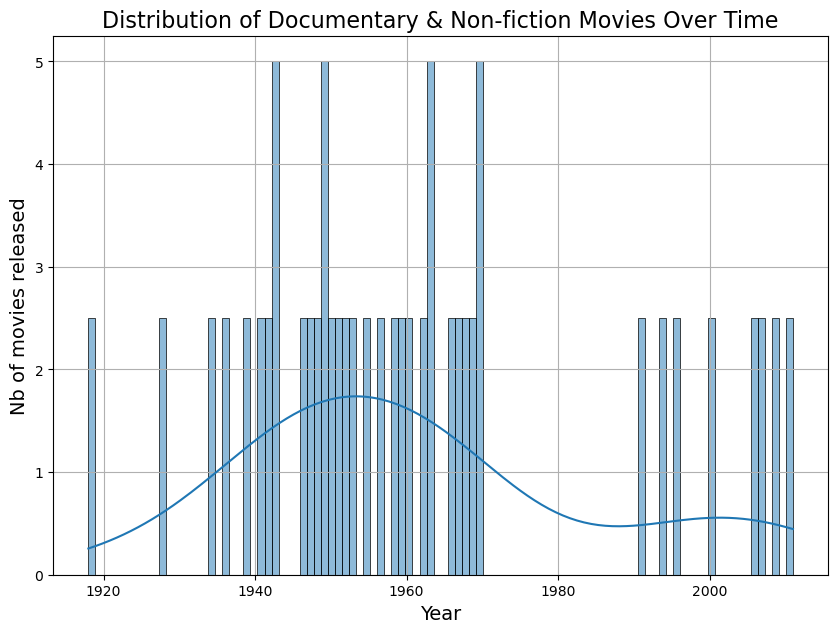

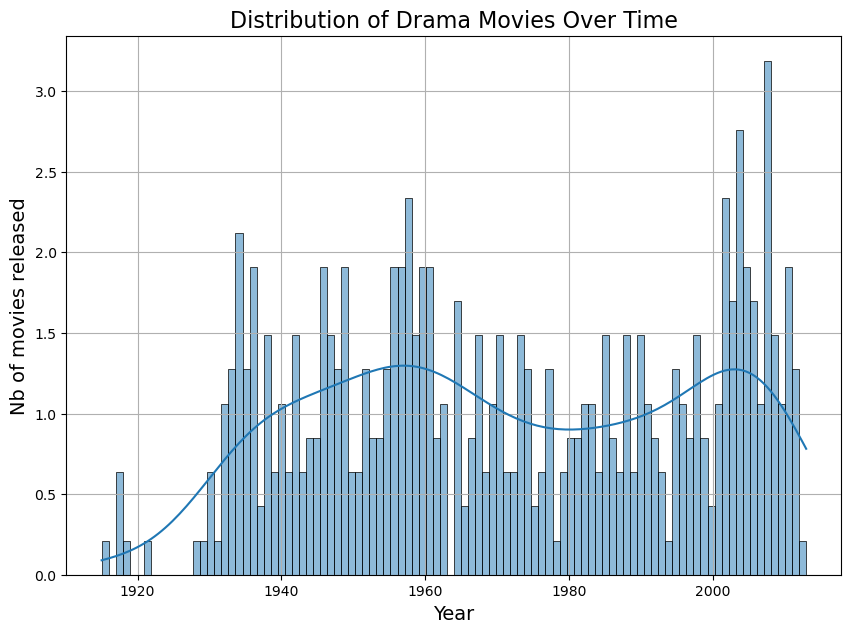

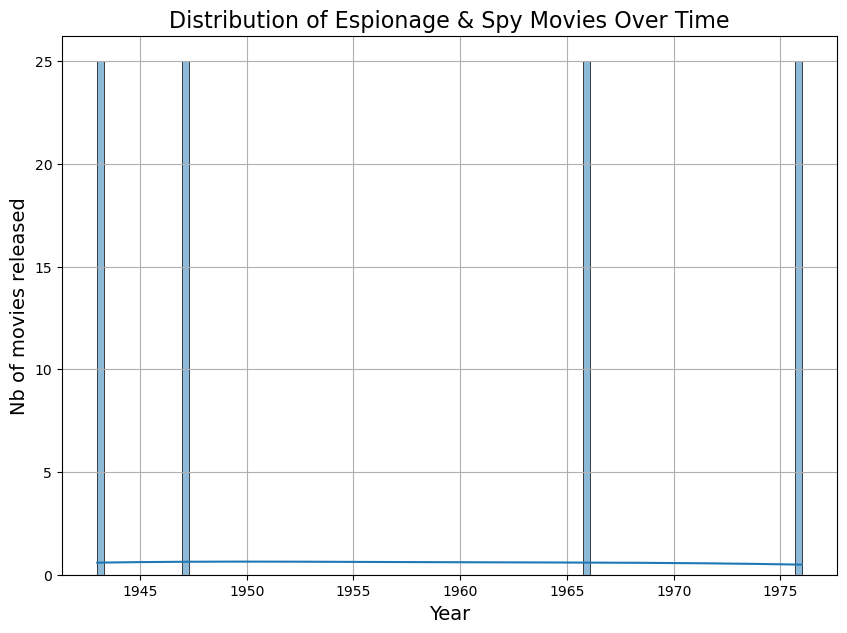

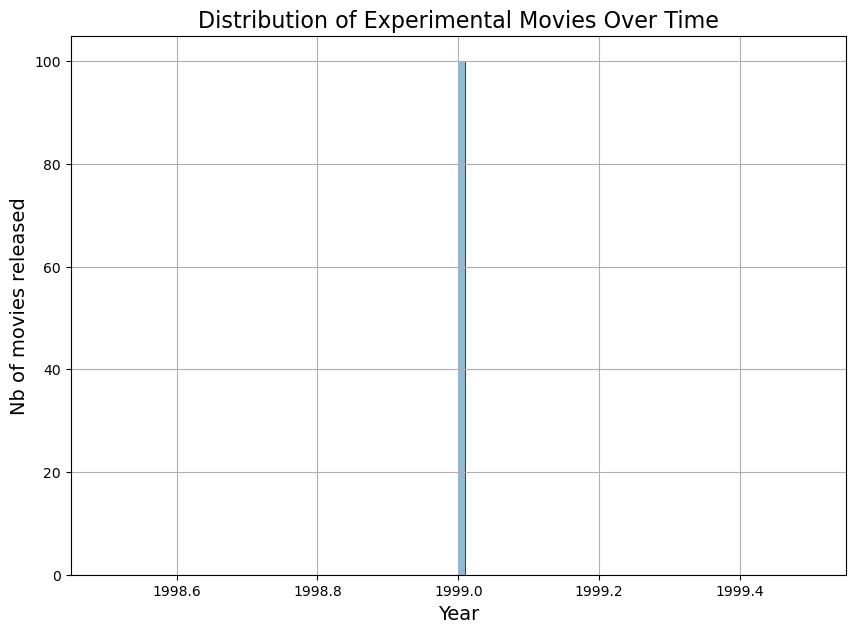

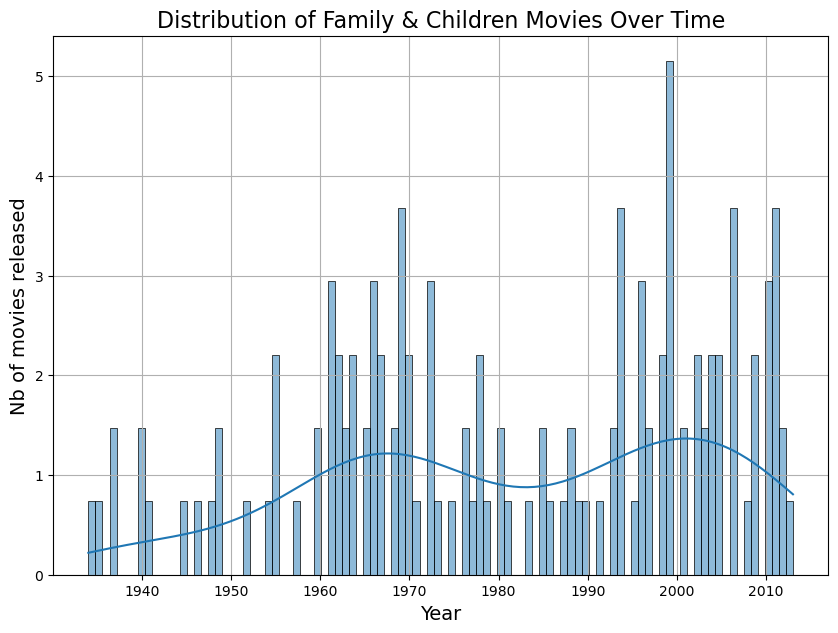

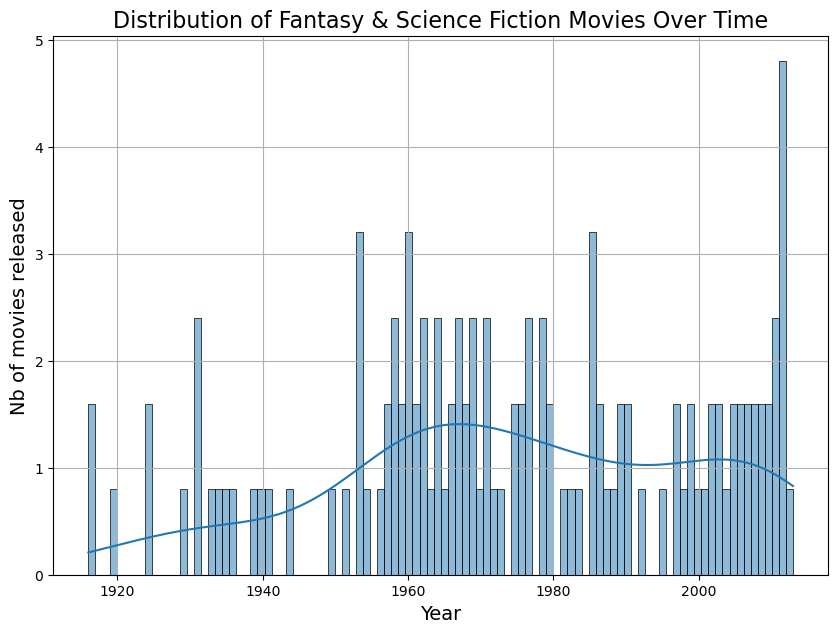

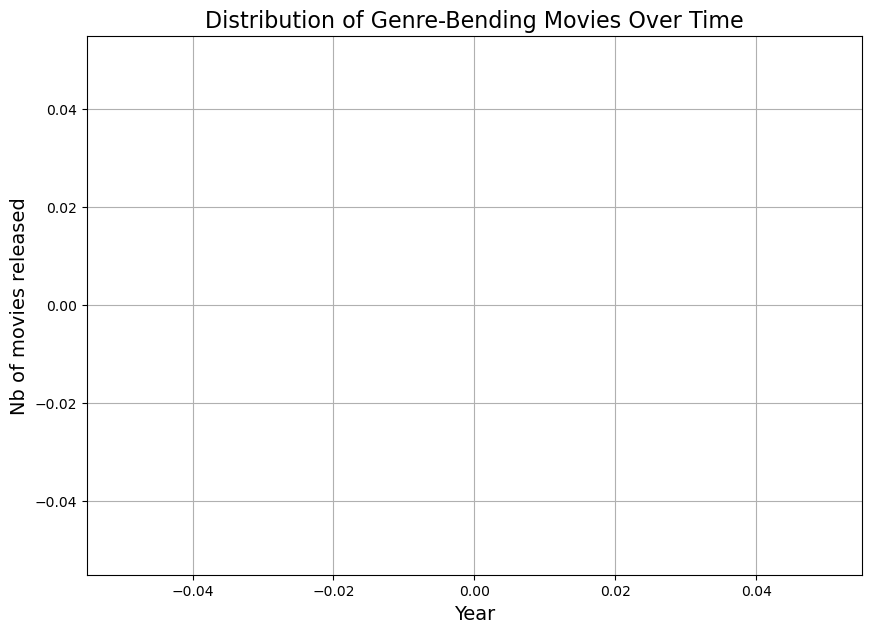

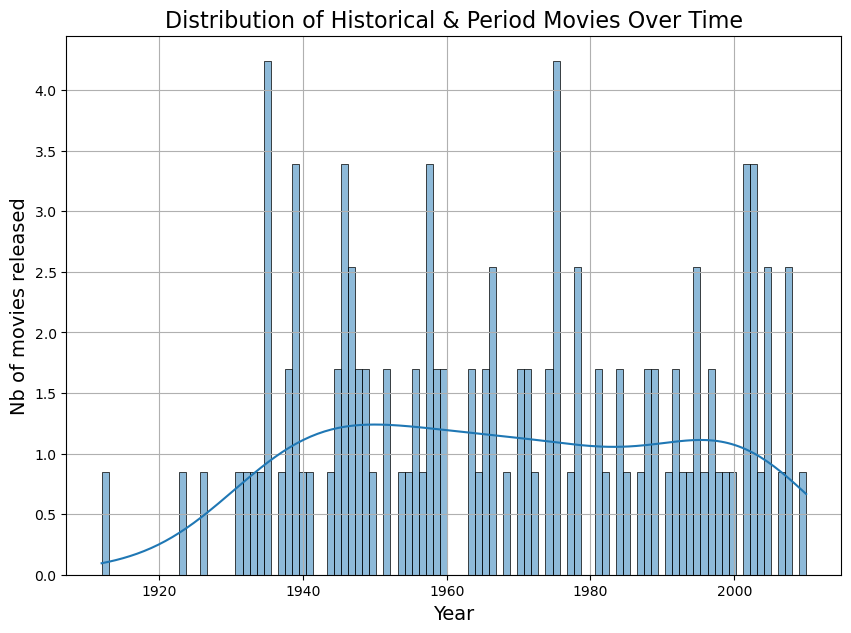

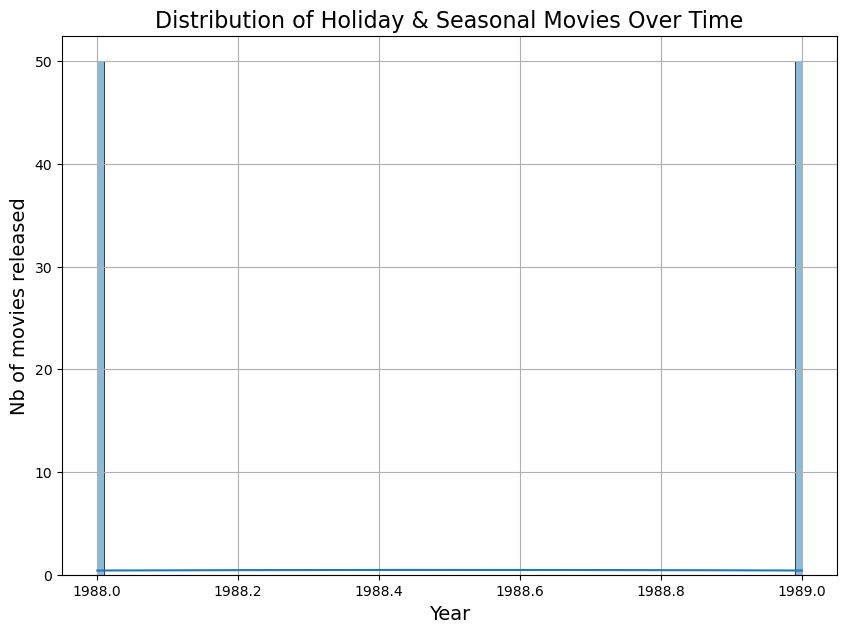

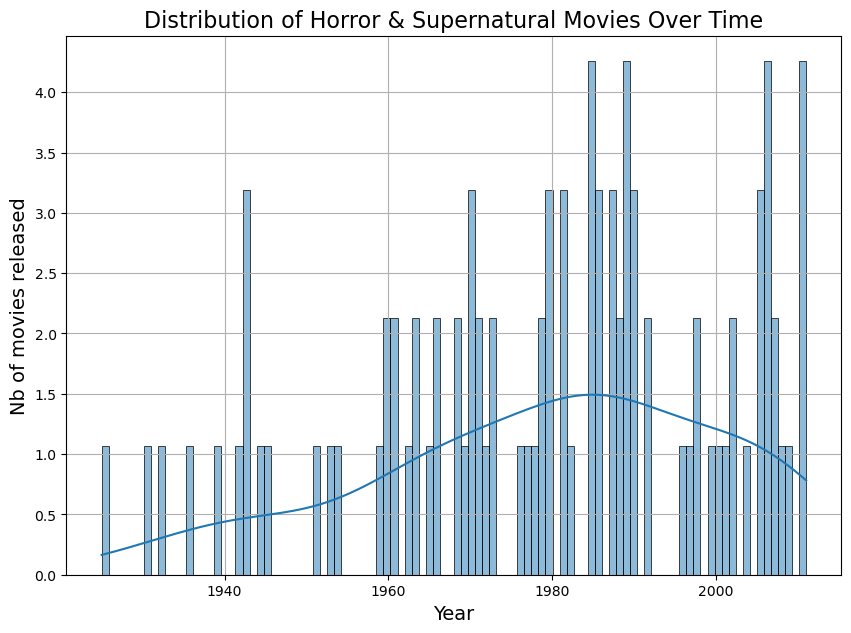

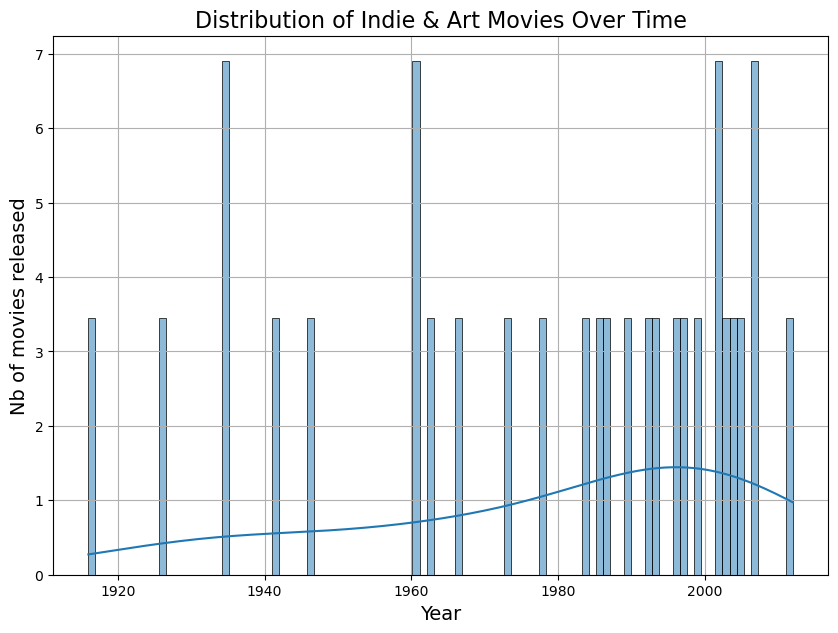

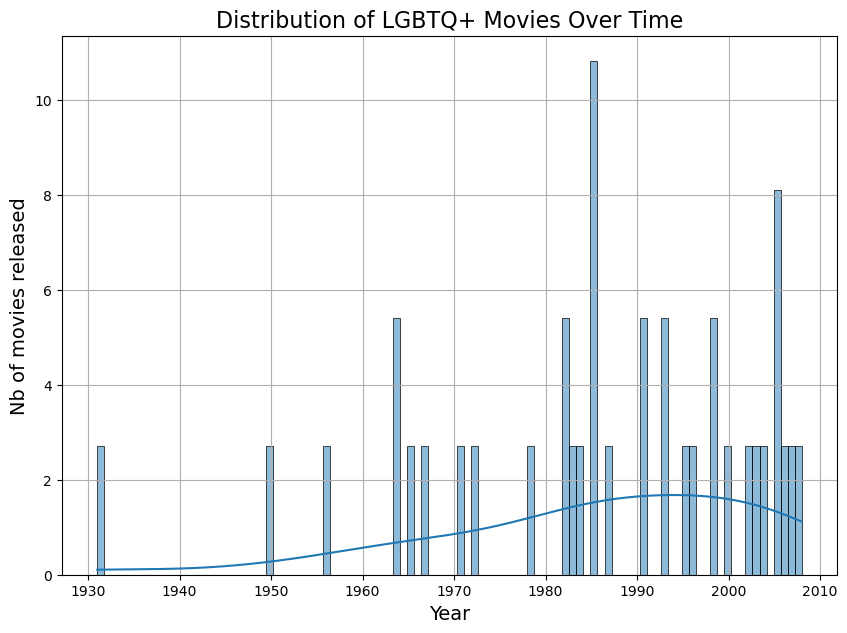

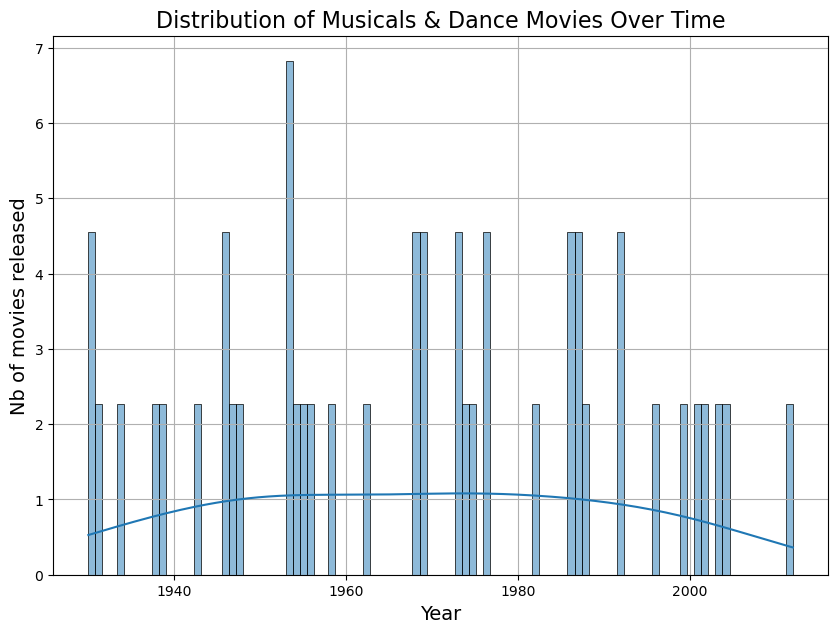

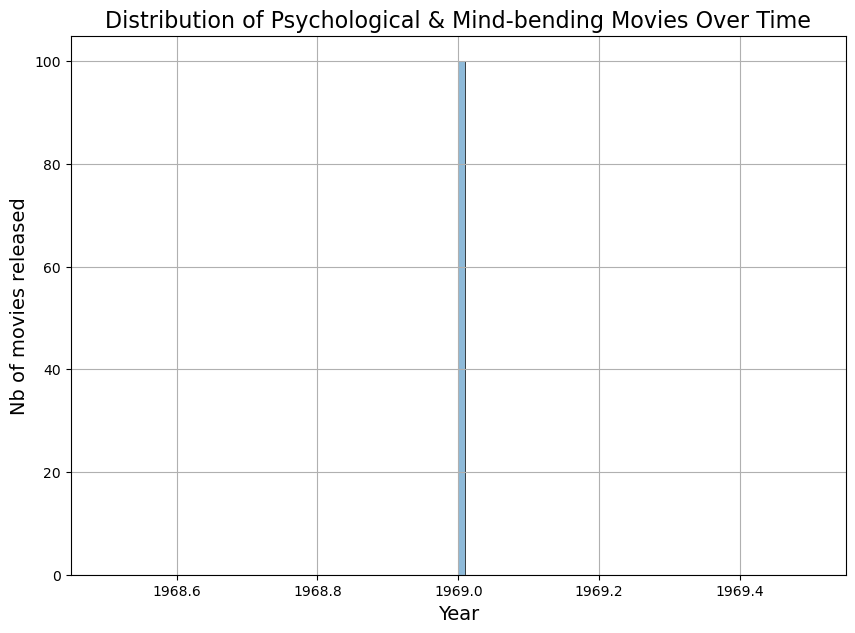

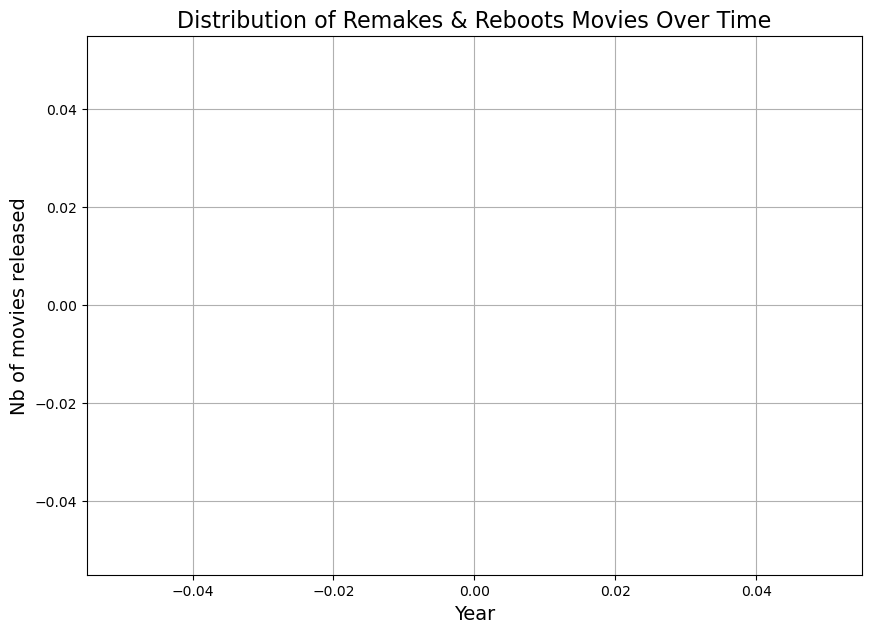

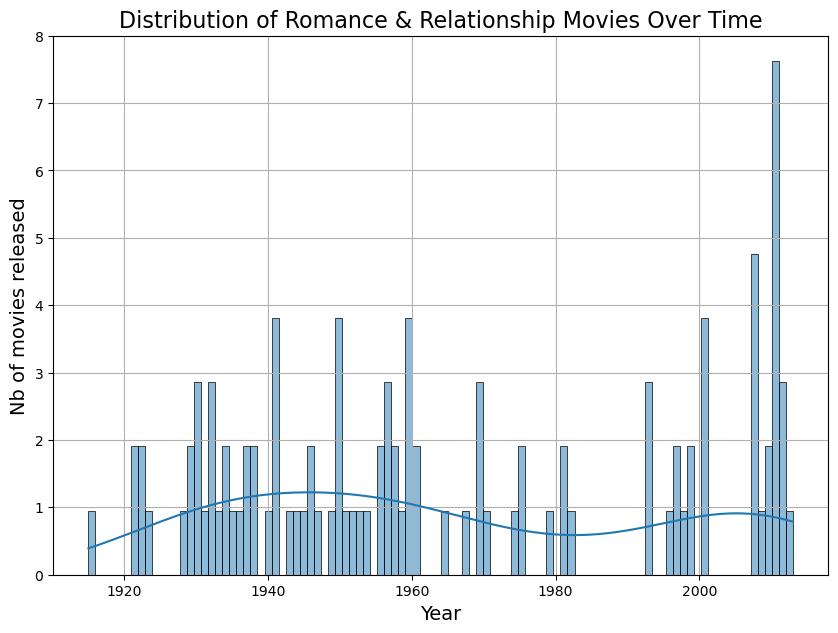

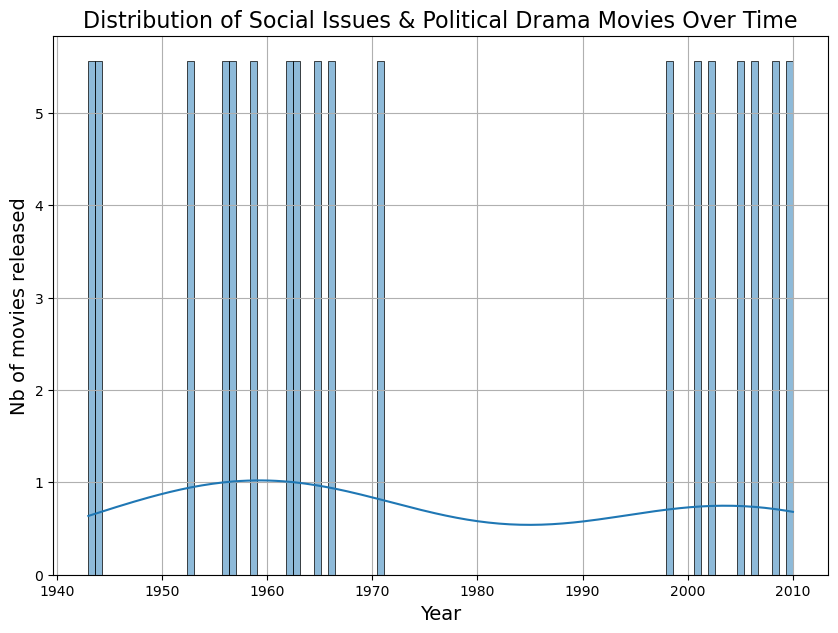

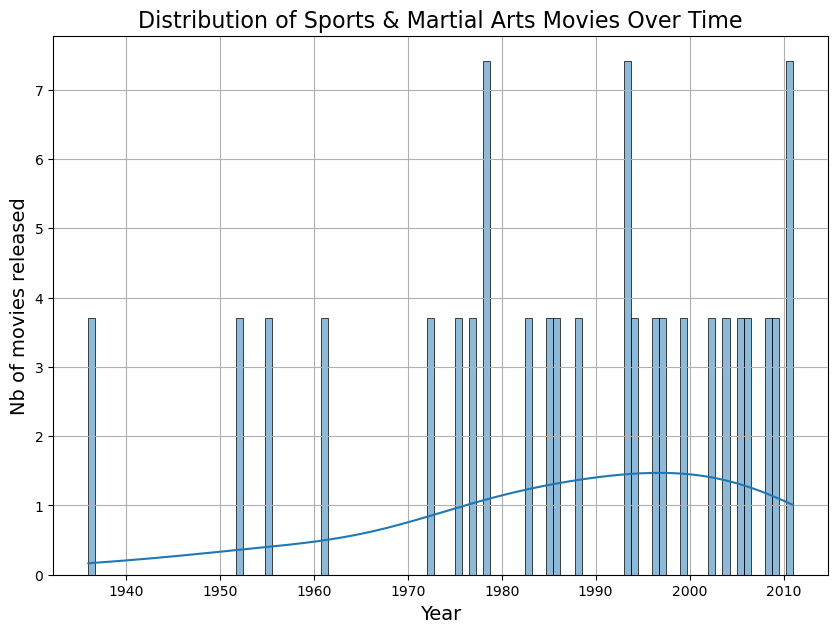

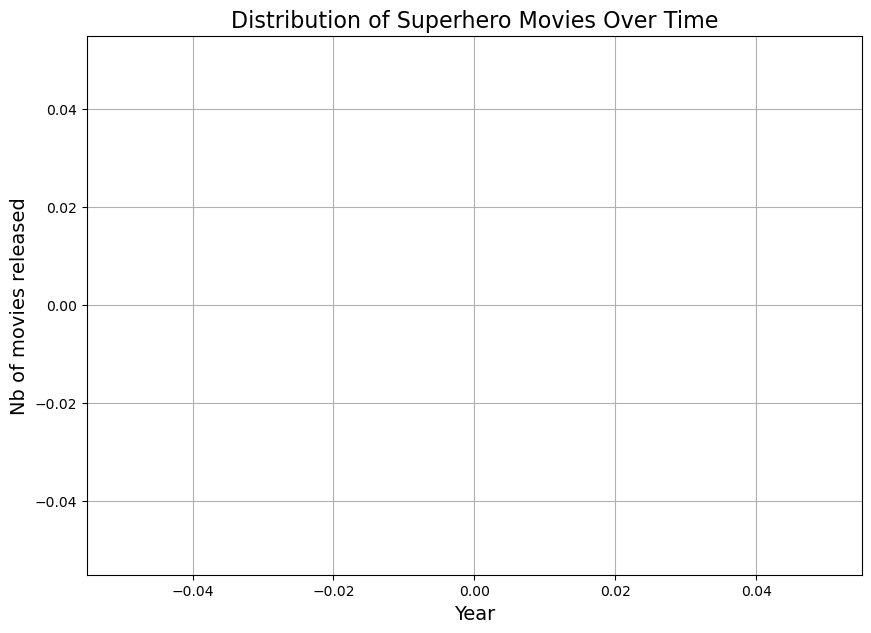

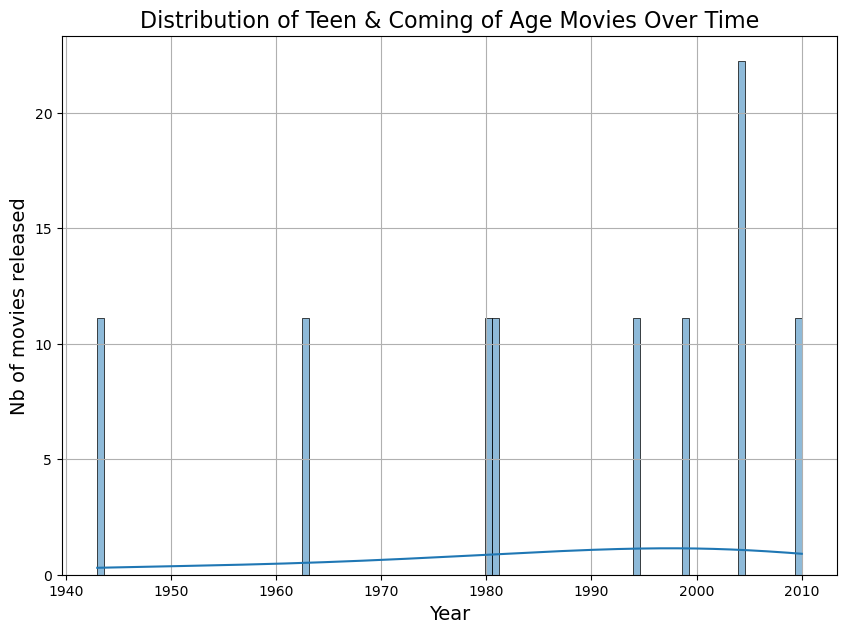

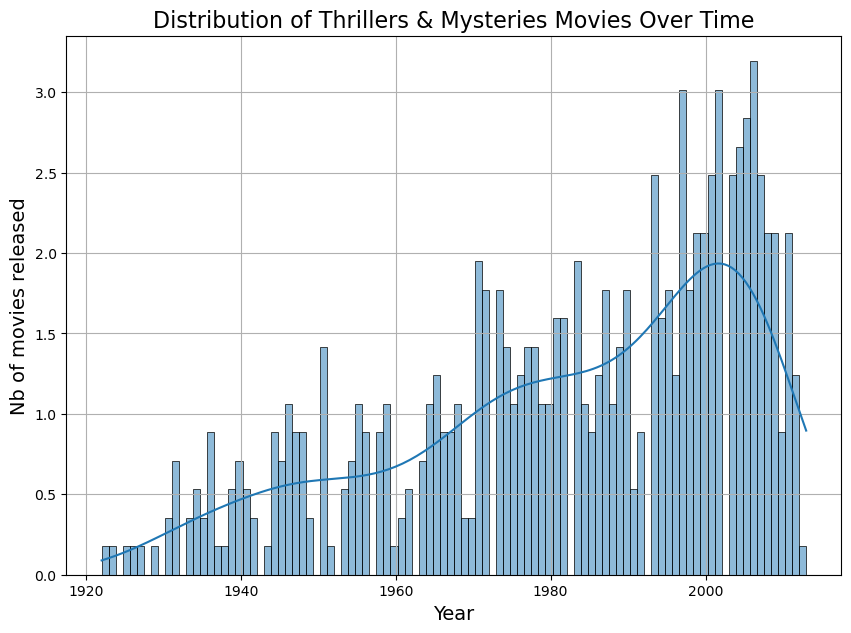

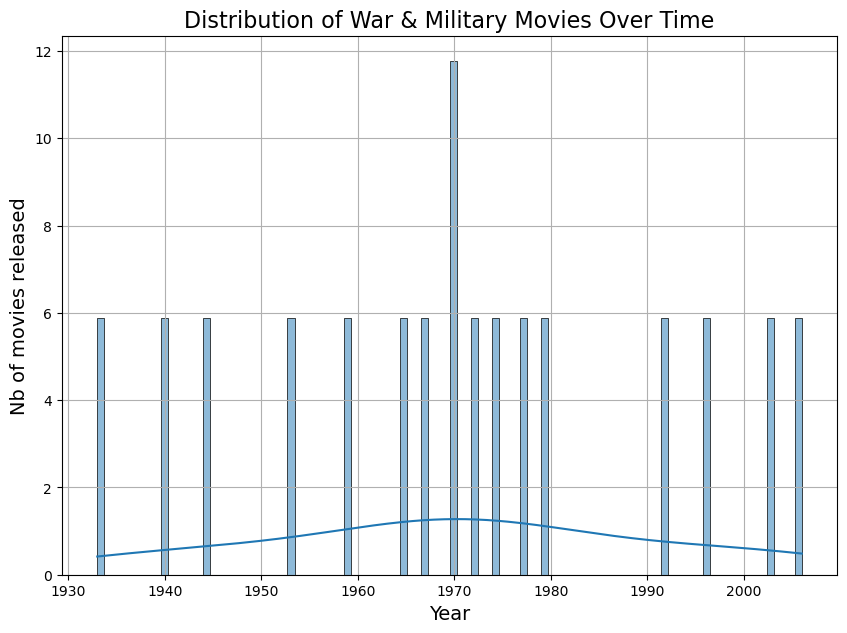

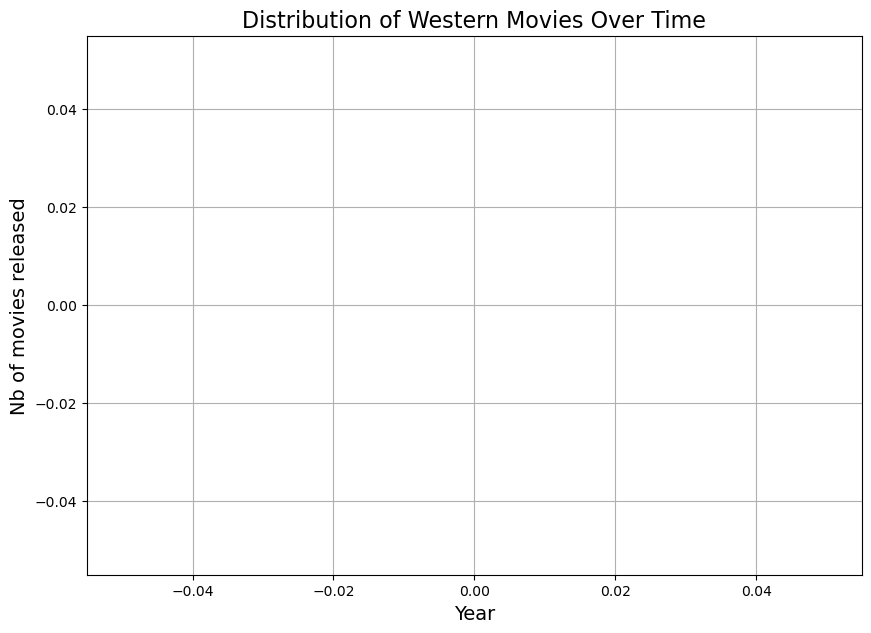

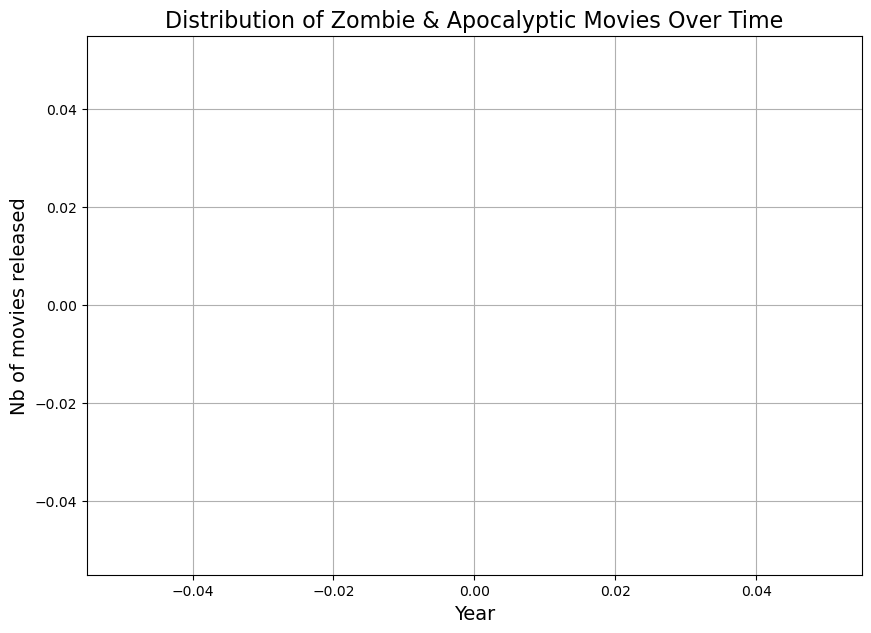

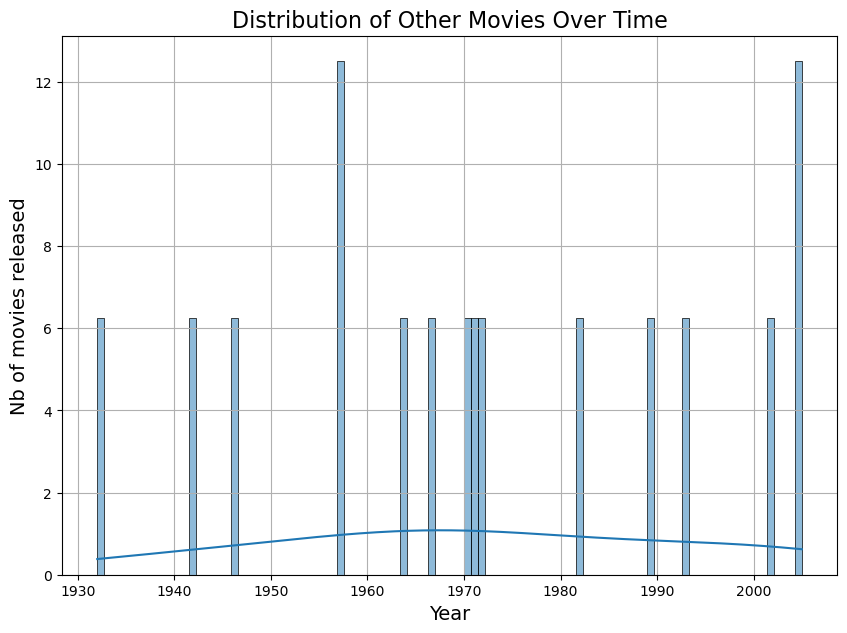

In [8]:
for category in genre_categories:
    fig = plt.figure(figsize=(10, 7))
    sns.histplot(evolution_adapt[category], stat='percent', kde=True, bins=100)
    plt.title(f"Distribution of {category} Movies Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Nb of movies released", fontsize=14)
    plt.grid(True) 
    

/tmp/ipykernel_9824/2632461556.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 7))


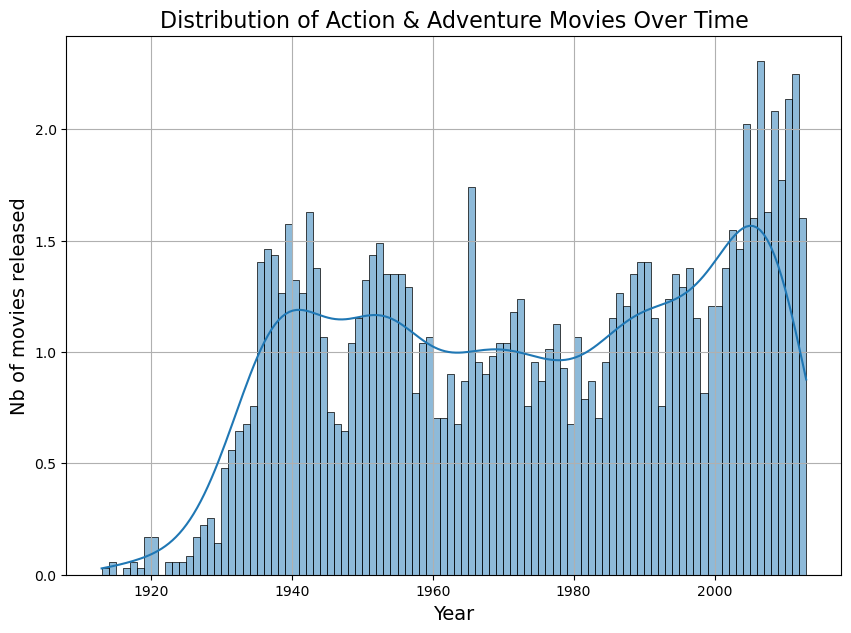

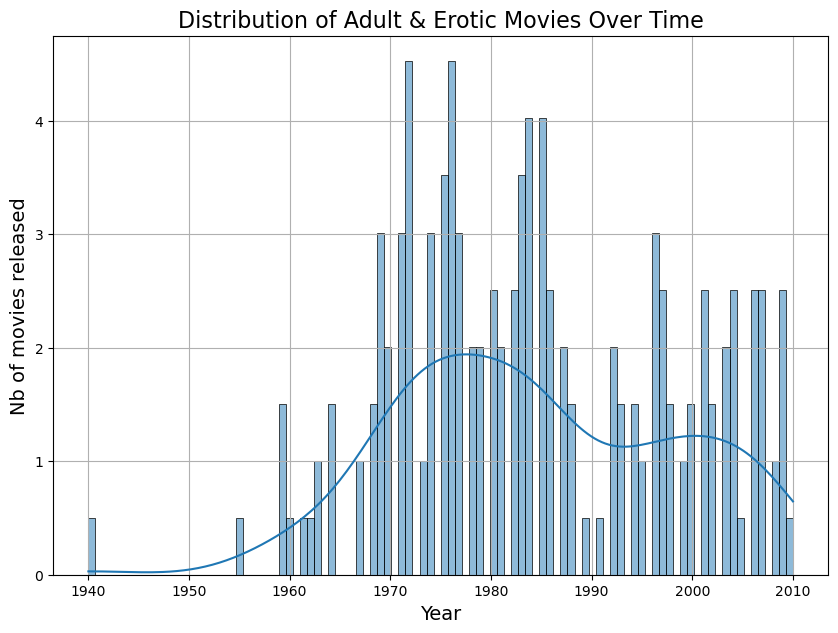

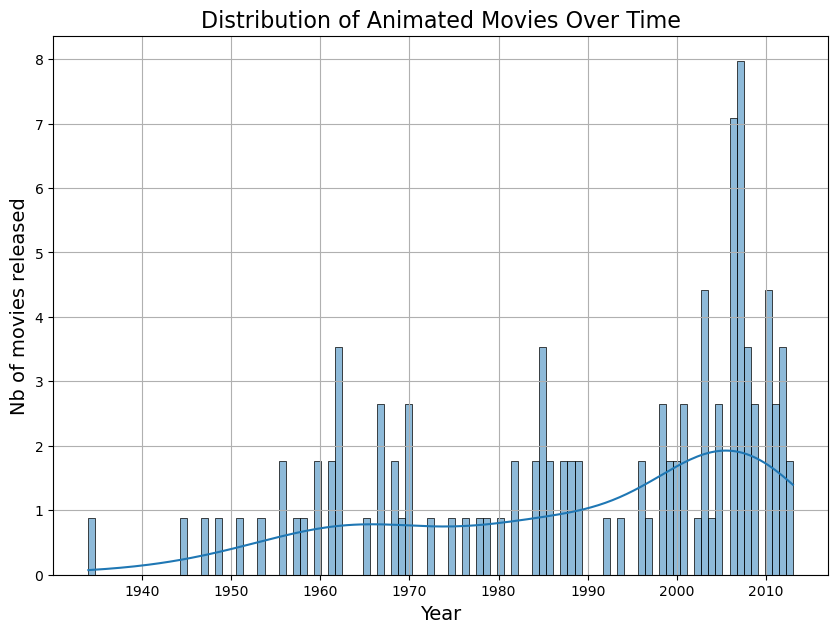

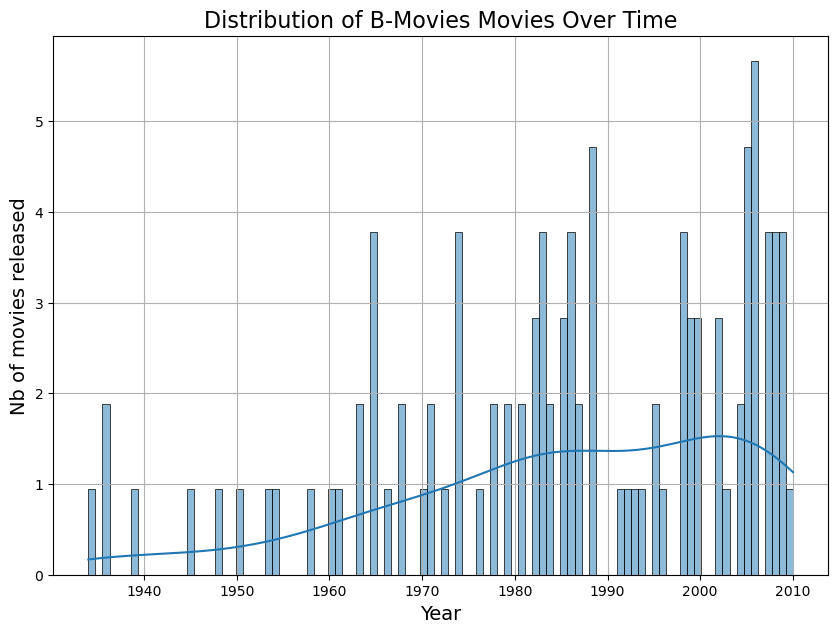

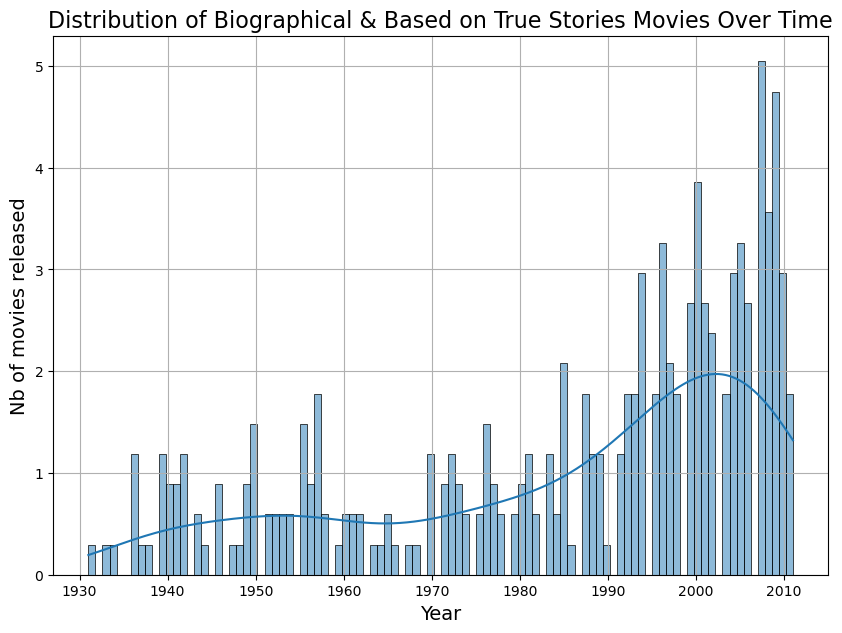

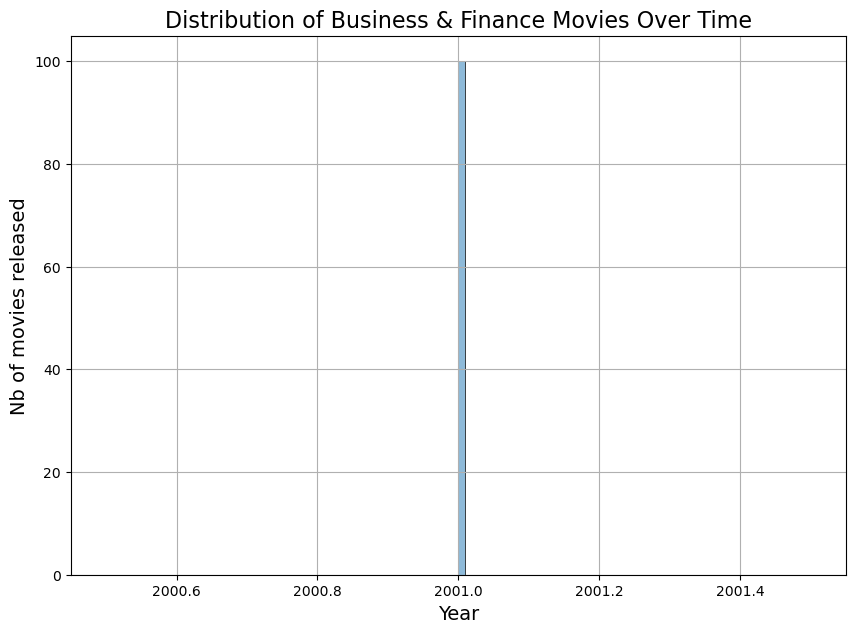

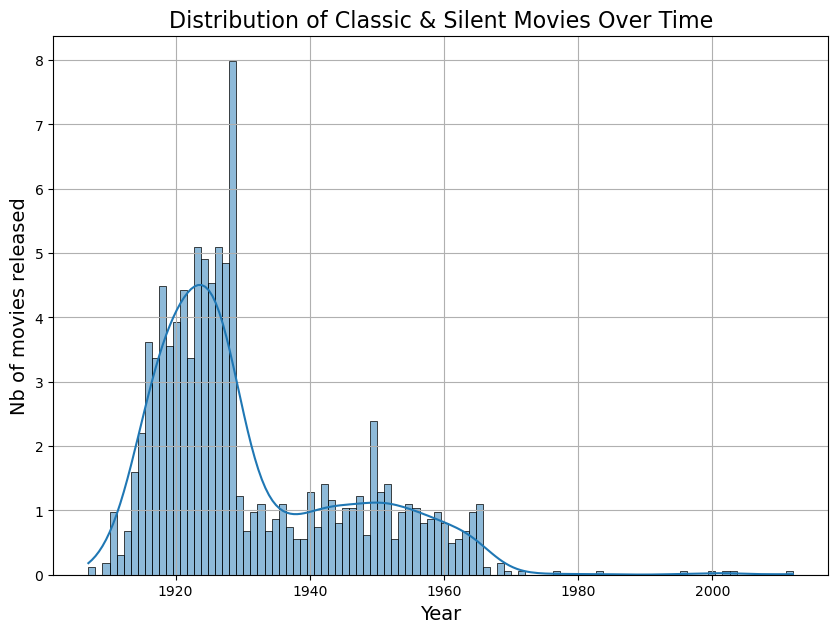

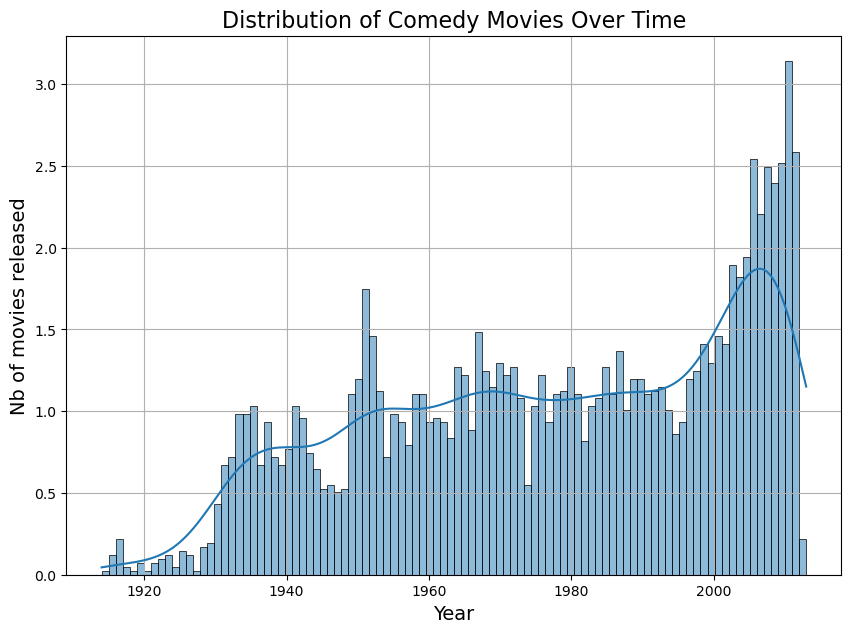

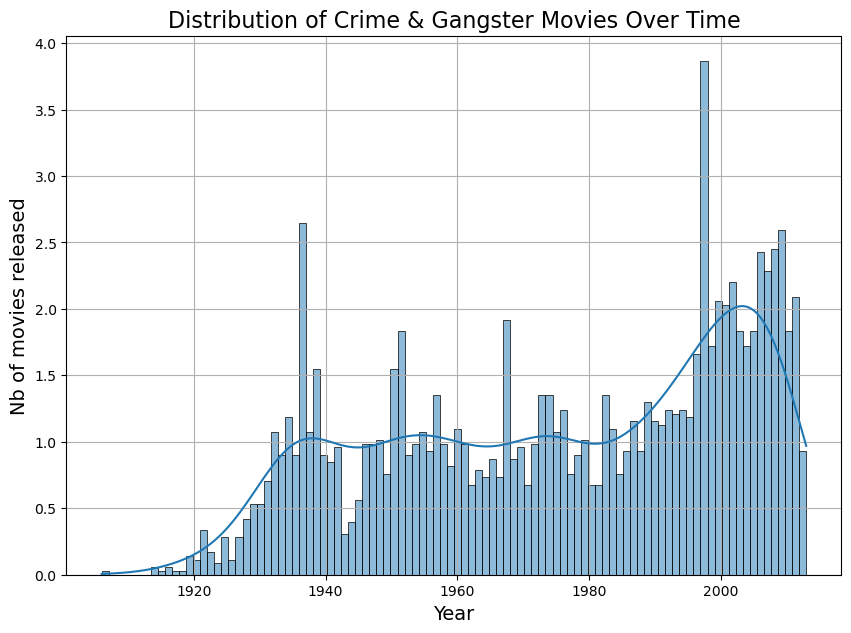

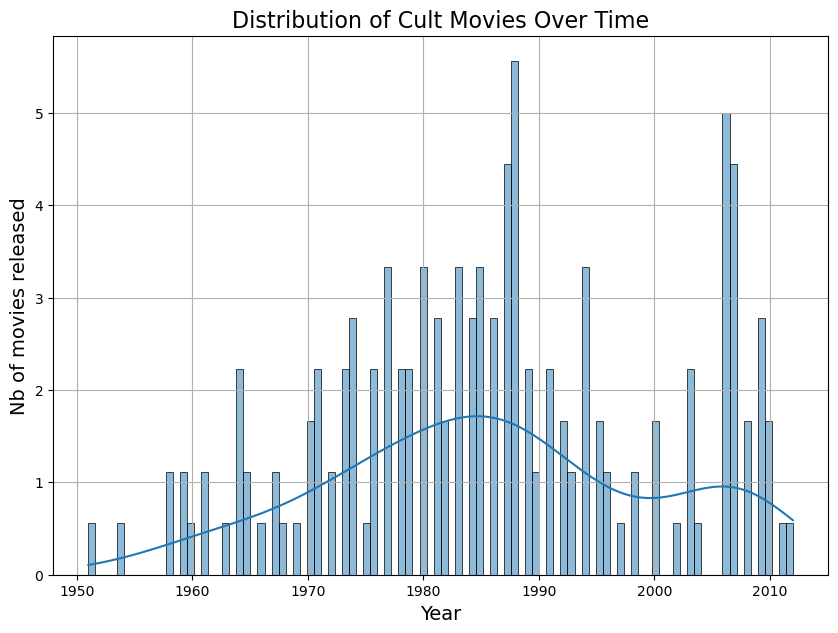

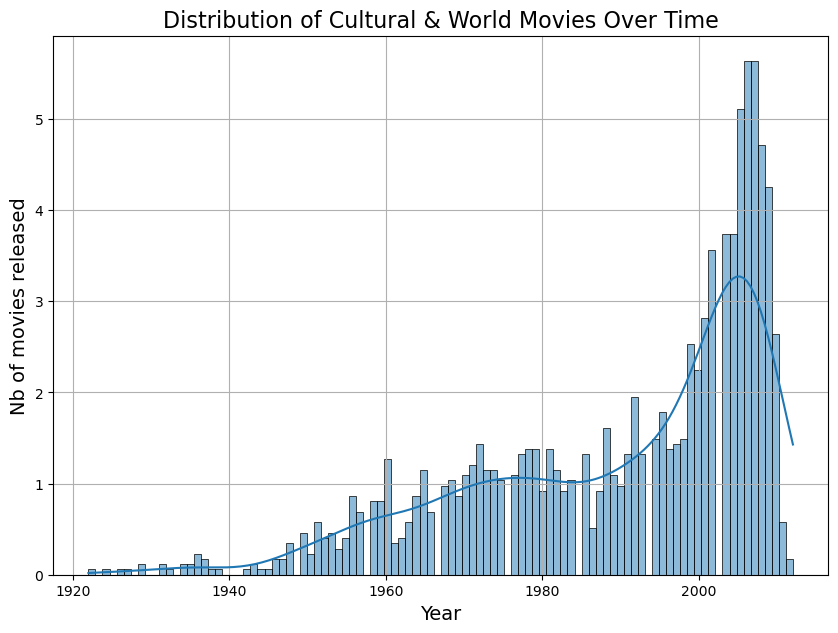

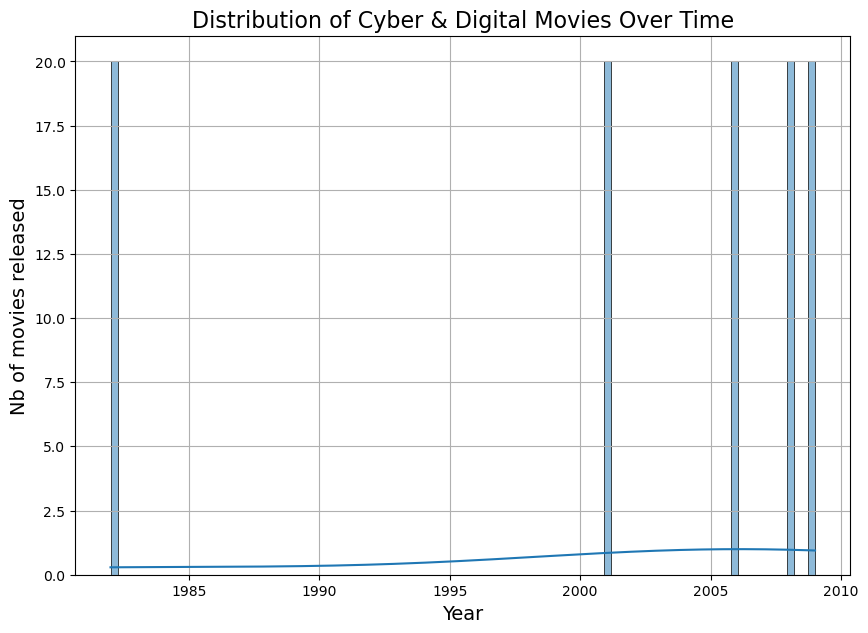

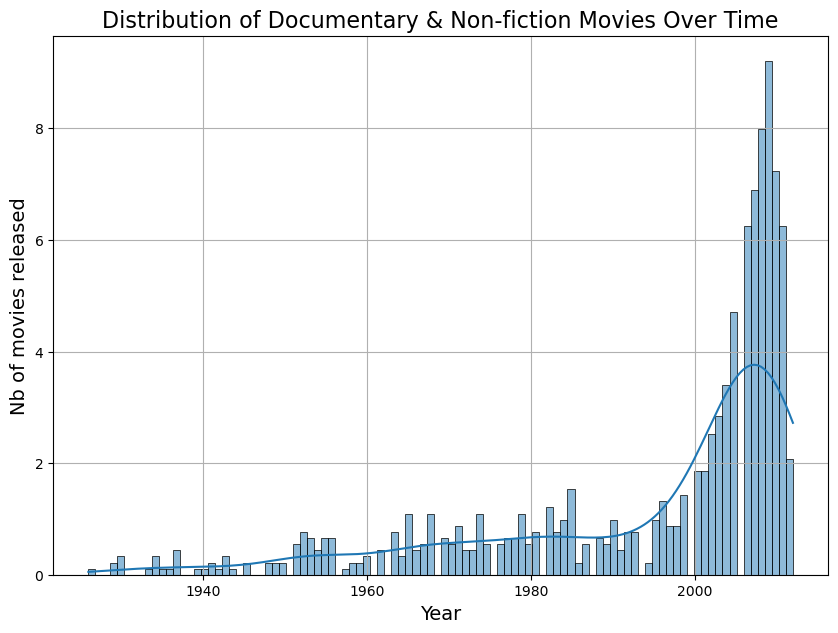

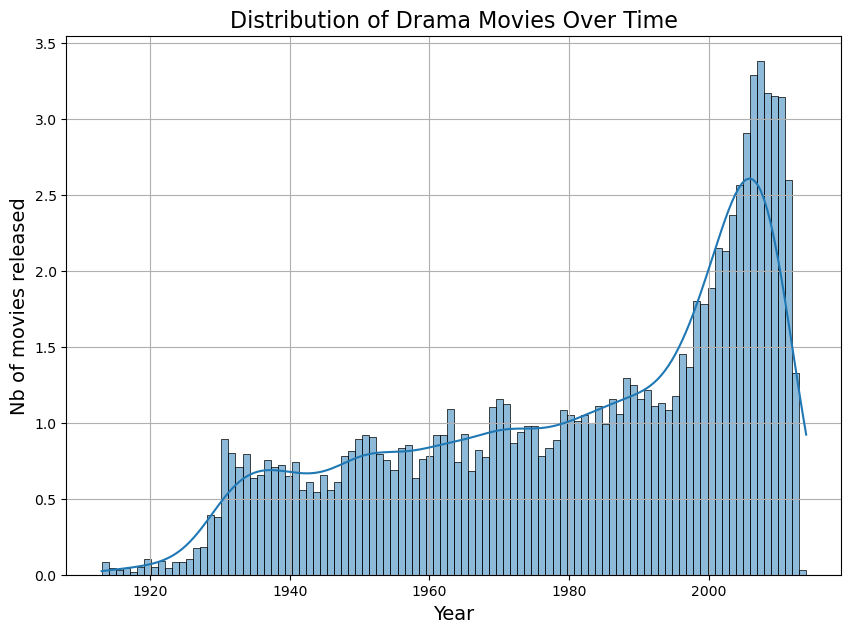

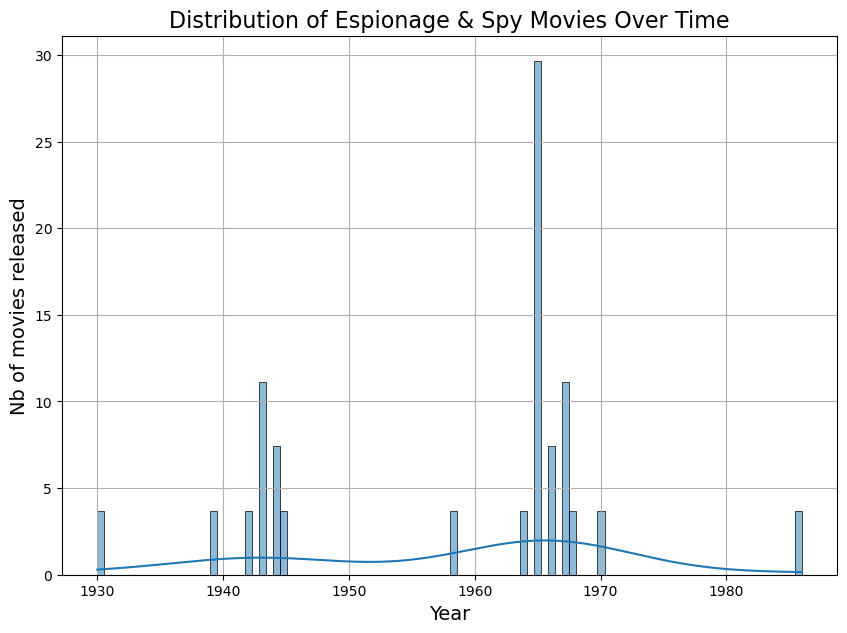

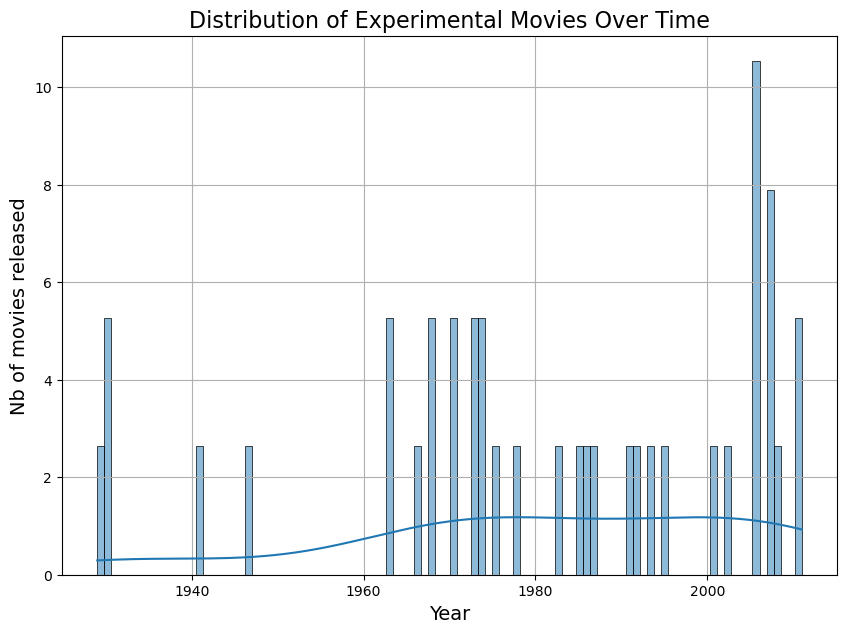

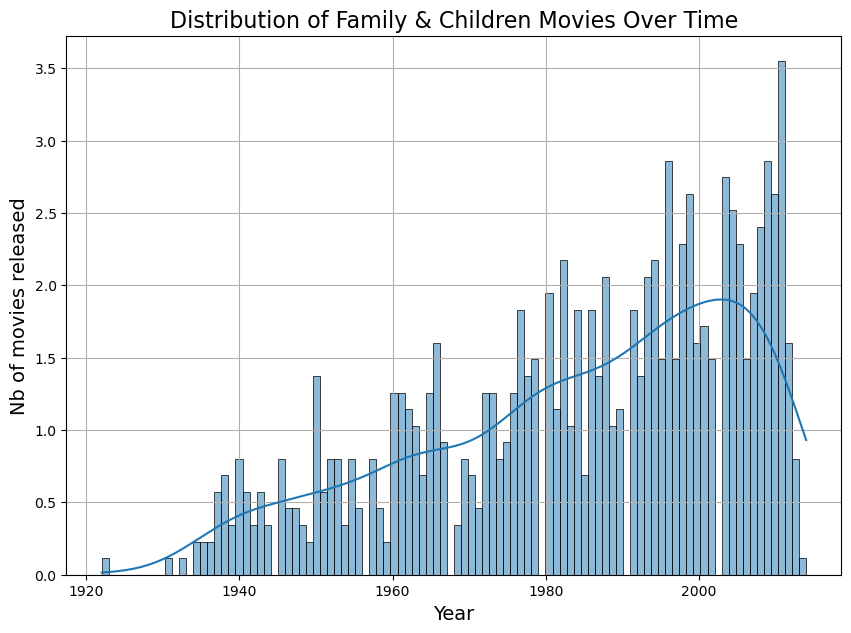

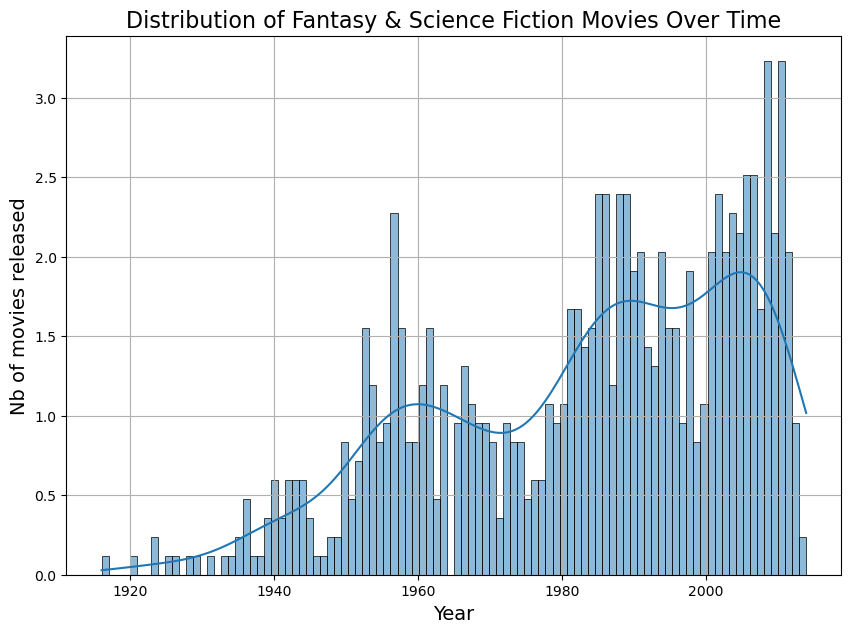

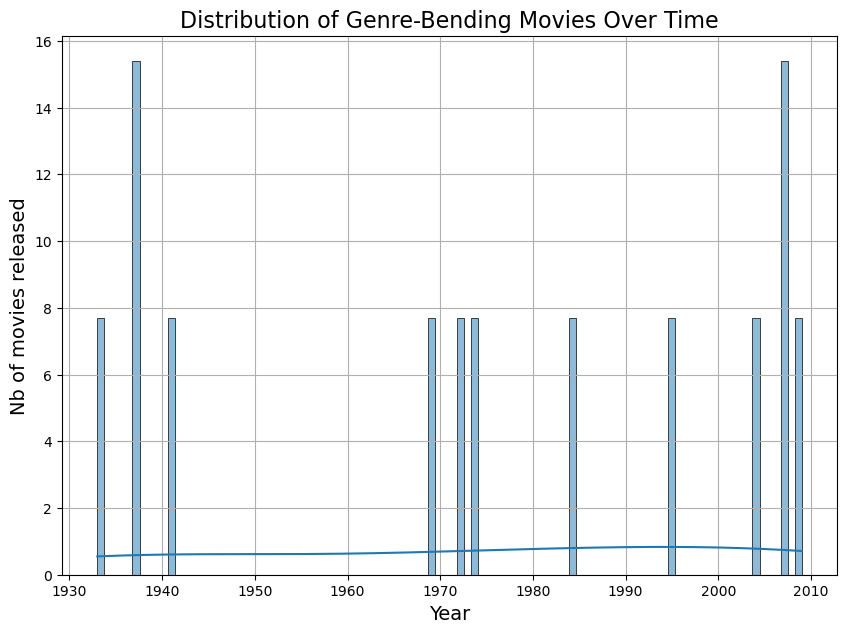

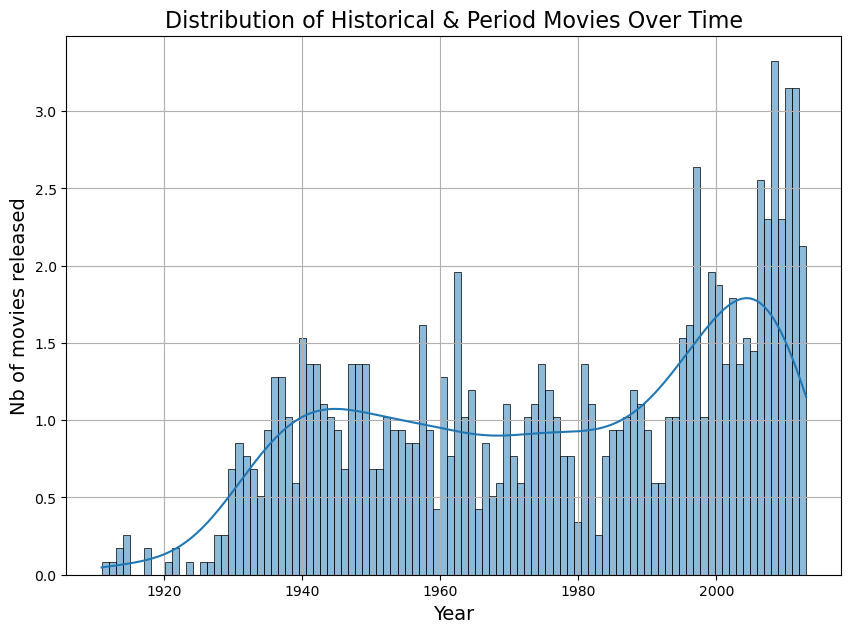

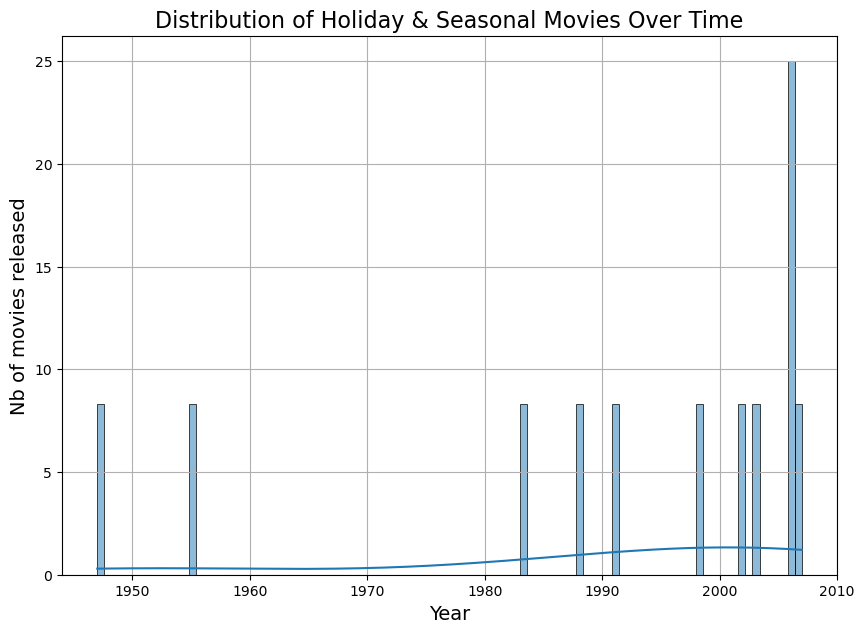

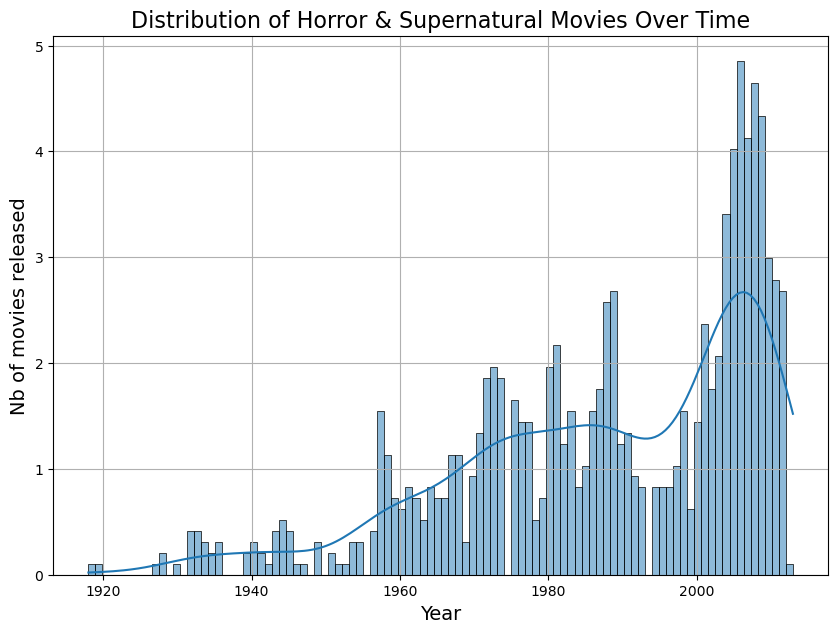

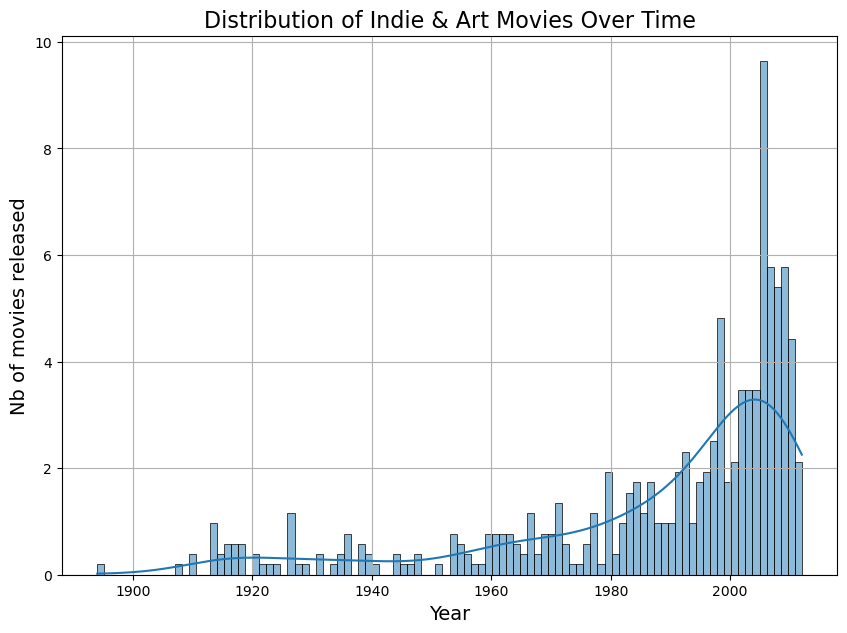

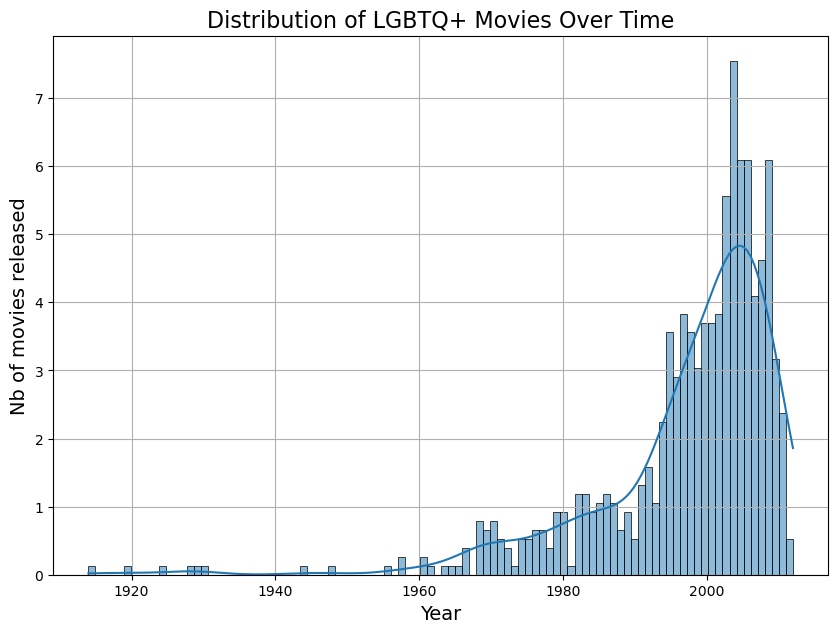

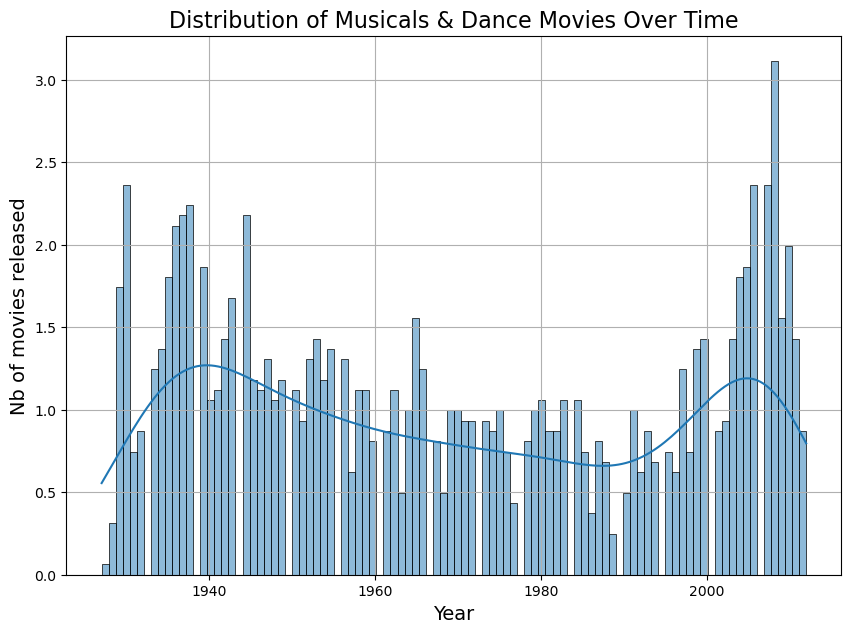

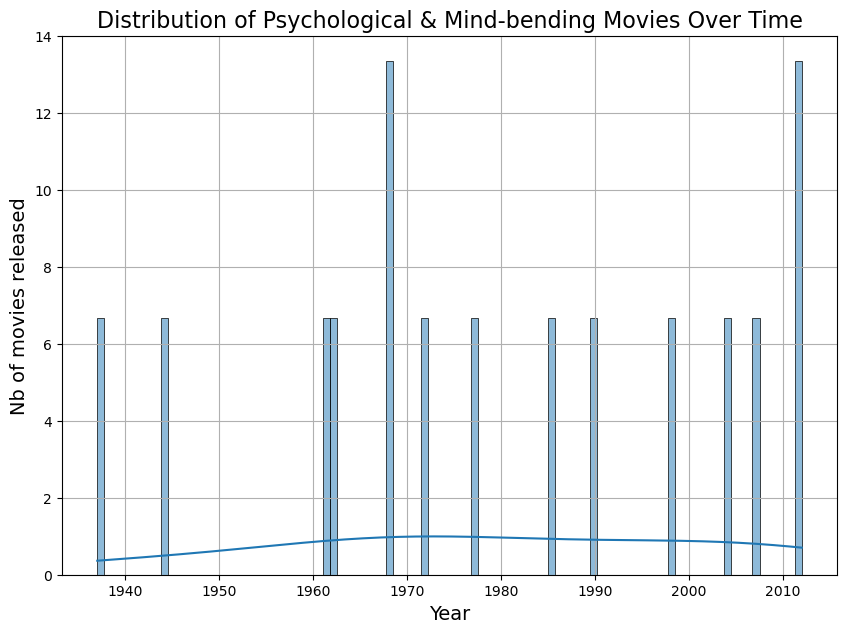

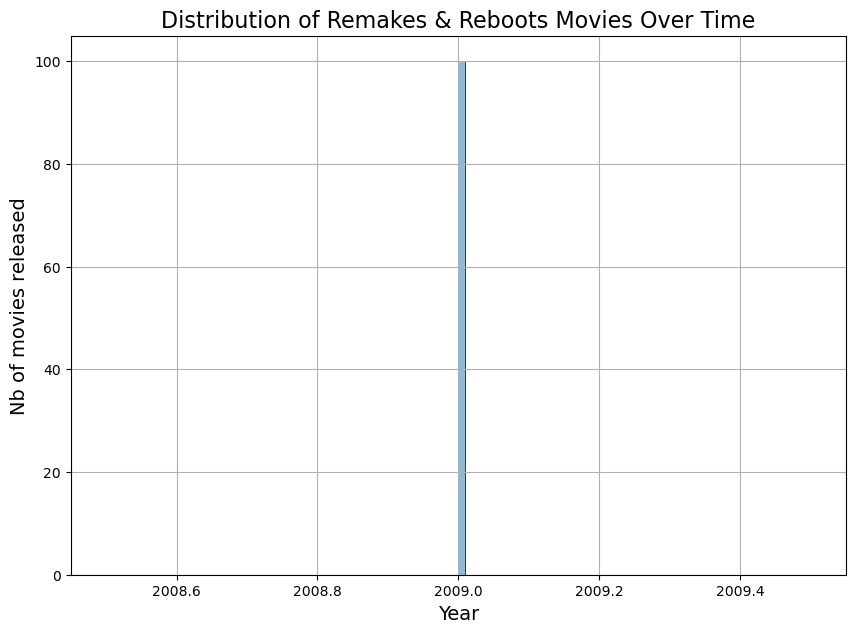

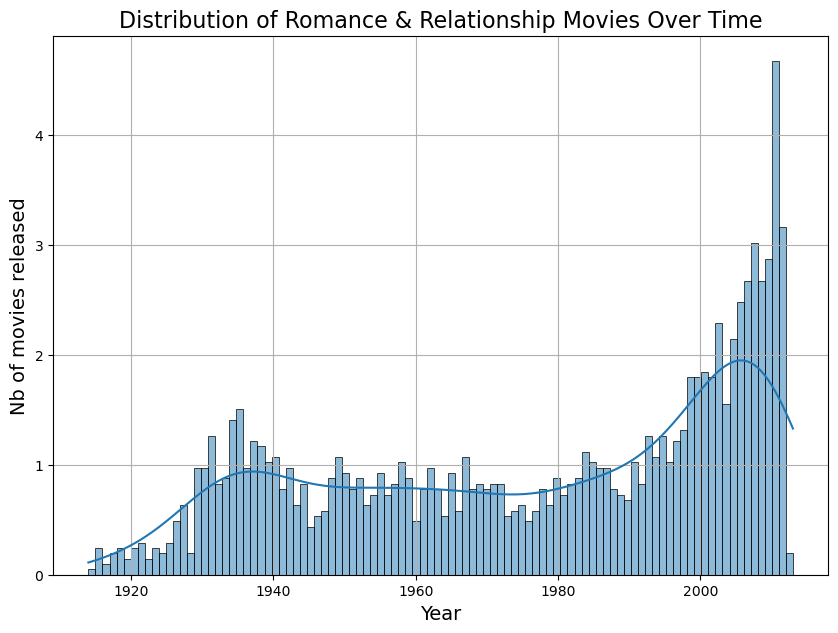

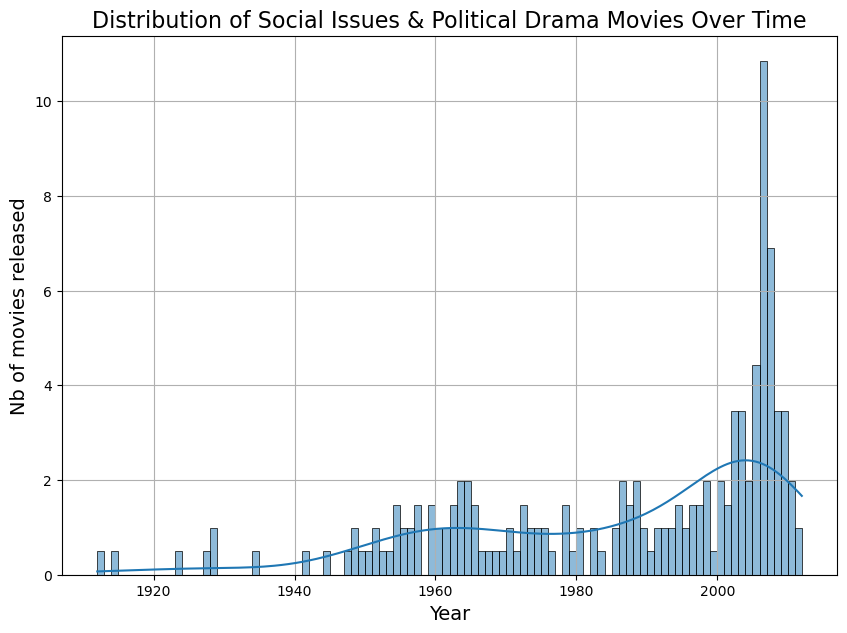

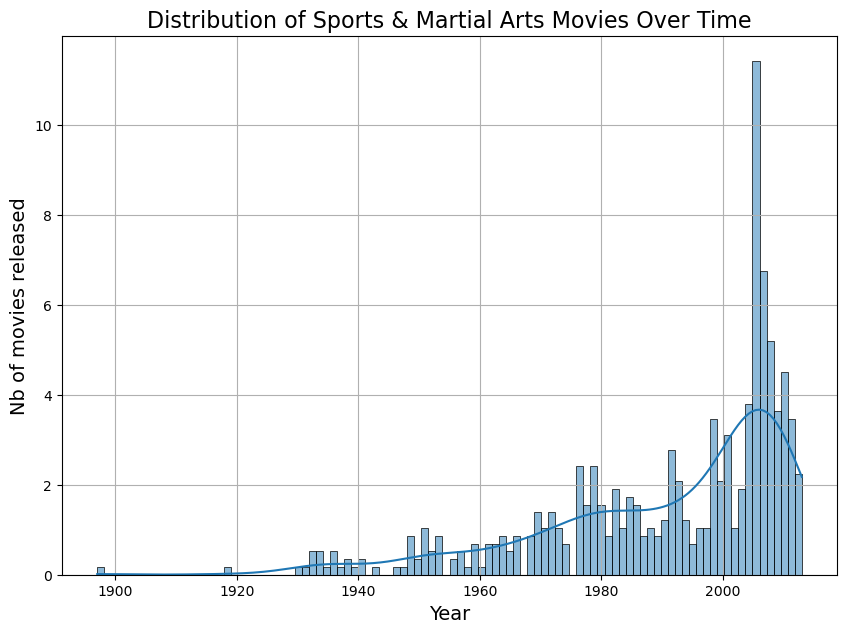

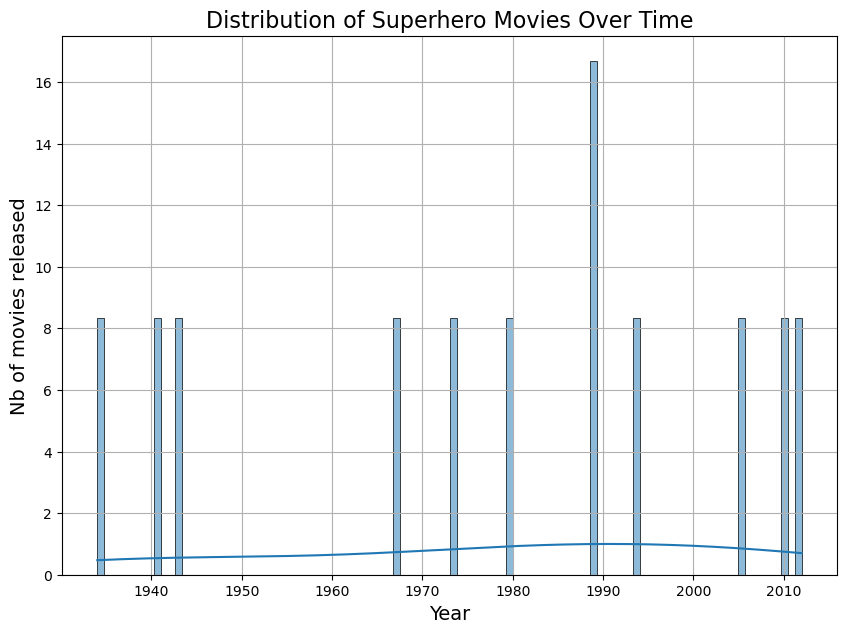

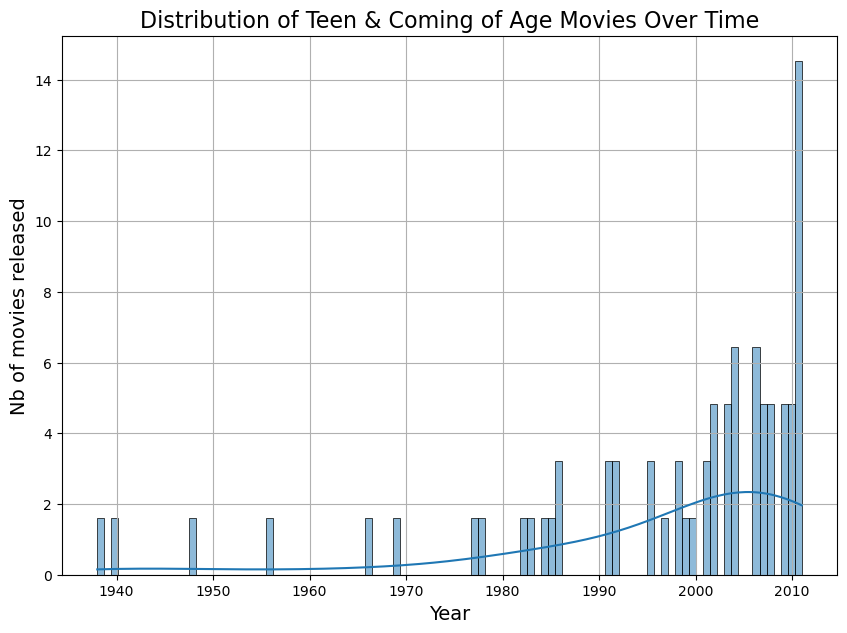

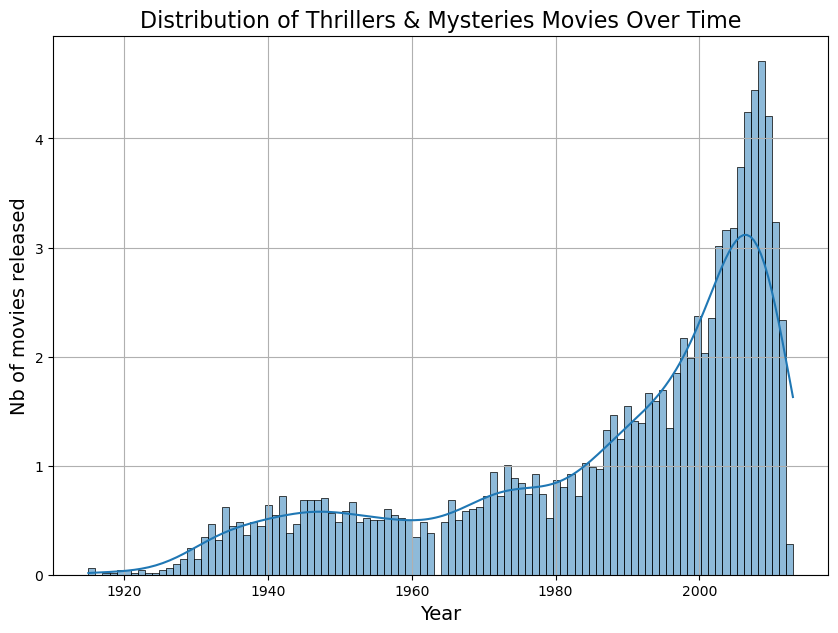

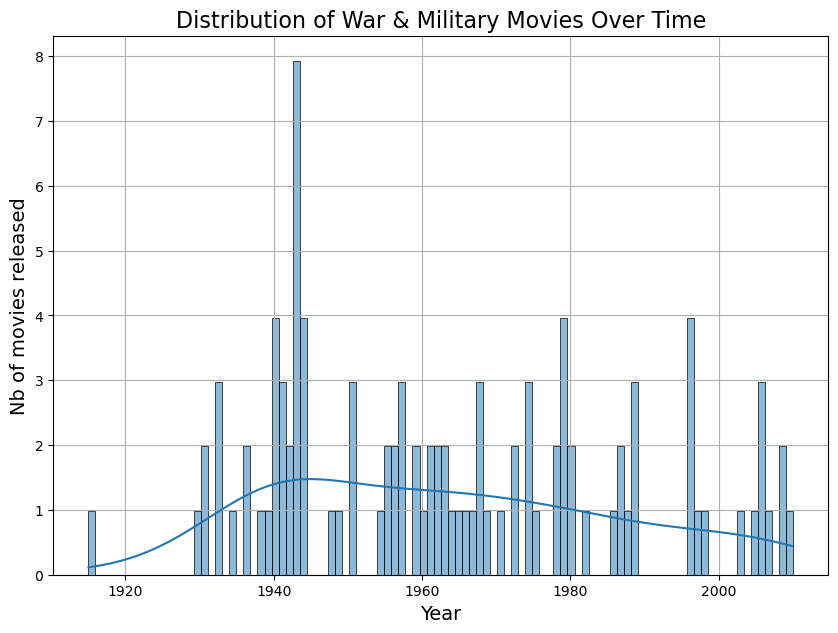

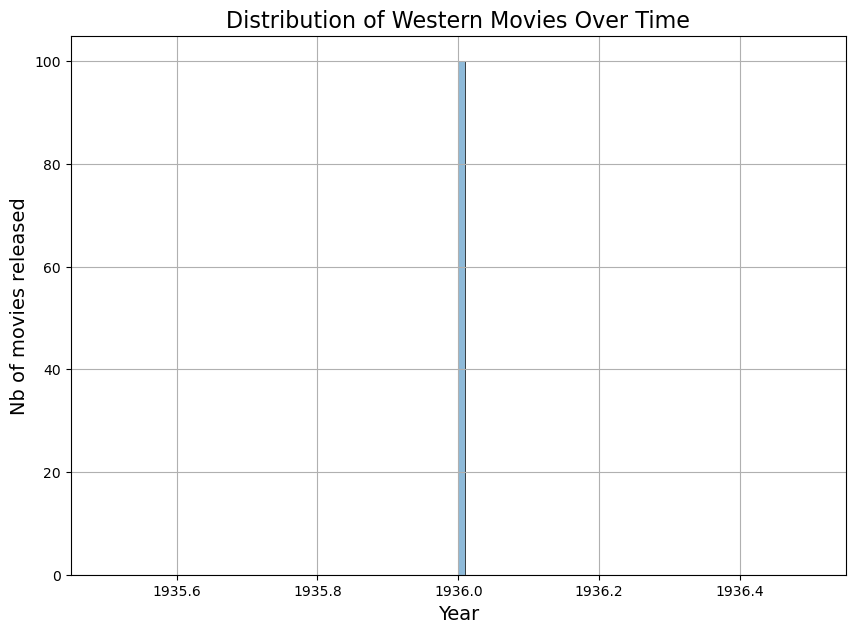

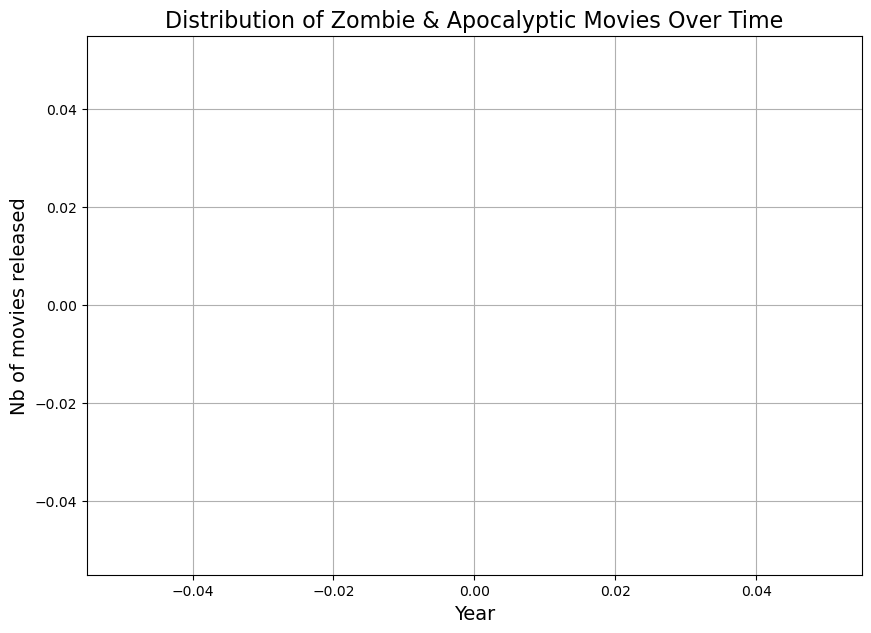

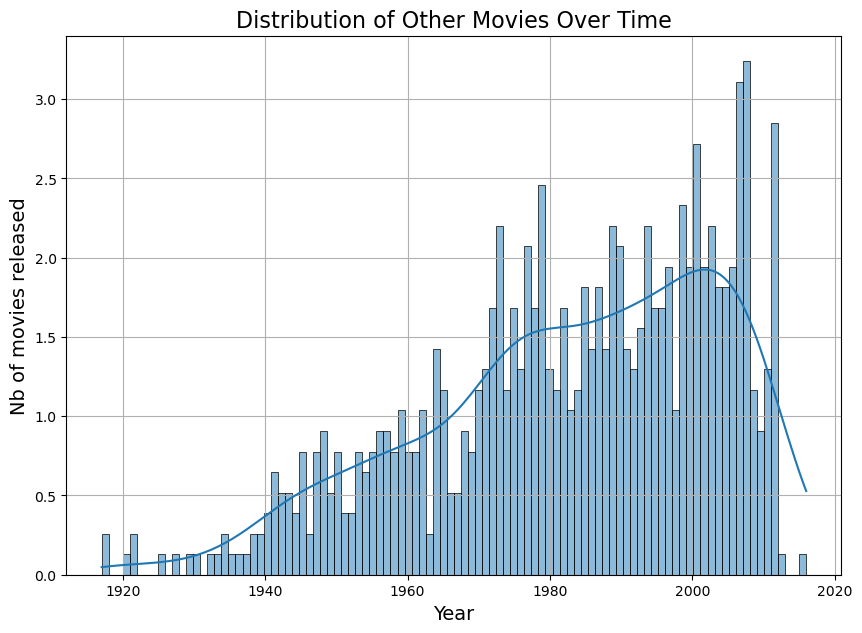

In [9]:
for category in genre_categories:
    fig = plt.figure(figsize=(10, 7))
    sns.histplot(evolution_non_adapt[category], stat='percent', kde=True, bins=100)
    plt.title(f"Distribution of {category} Movies Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Nb of movies released", fontsize=14)
    plt.grid(True) 

## Plot Evolution Action & Adventure Movies over time 

In [10]:
def compute_spearman_corr(df_adapted, df_non_adapted, category): 
    cat_adapted_df = pd.DataFrame(df_adapted[category].value_counts())
    cat_non_adapted_df = pd.DataFrame(df_non_adapted[category].value_counts())
    cat_adapted_df.columns = ['AdaptedCount']
    cat_non_adapted_df.columns = ['NonAdaptedCount']
    merged = pd.merge(cat_adapted_df, cat_non_adapted_df, left_index=True, right_index=True, how='outer').fillna(0)
    res = stats.spearmanr(merged['AdaptedCount'], merged['NonAdaptedCount'])
    return res
    


In [25]:
def create_evolution_plot(df_adapted, df_non_adapted, category, y_pos=15):
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=df_adapted[category], 
                           histnorm='percent', 
                           name='Adapted',
                           marker=dict(color='beige')),  )
    fig.add_trace(go.Histogram(x=df_non_adapted[category],
                           histnorm='percent', 
                           name='Non Adapted',
                           marker=dict(color='orange')))

    res = compute_spearman_corr(df_adapted, df_non_adapted, category)

    fig.add_annotation(
        x=2001, 
        y=y_pos, 
        text=f'Spearman : {res[0]:.2f} p-value: {res[1]:.2e}', 
        showarrow=False,  
        font=dict(size=14, color="white"), 
        align="center",
        bgcolor="rgba(0, 0, 0, 0.7)",  
        borderpad=4    
    )


    fig.update_layout(barmode='overlay',
                title=f"Evolution of Movie Production : {category}",
                xaxis_title="Year",
                yaxis_title="Produced Movies (%)",
                template="seaborn",
                showlegend=True)

    fig.show()

    

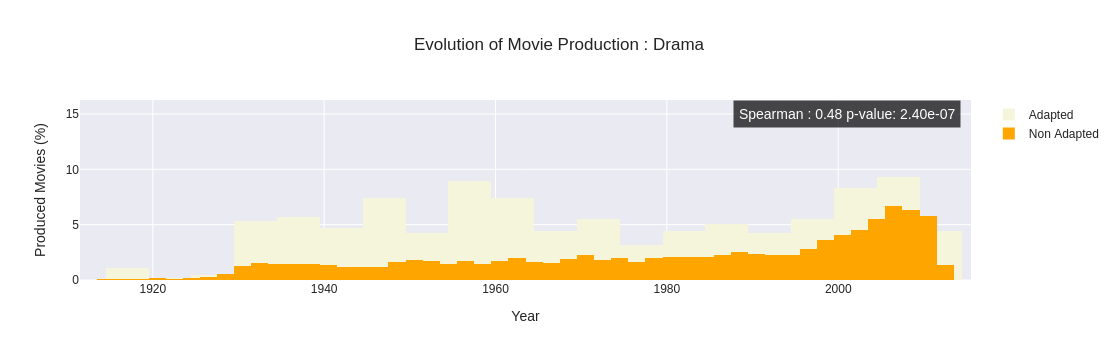

In [27]:
create_evolution_plot(evolution_adapt, evolution_non_adapt, 'Drama')

## Tentative Interactiv Plots

In [13]:

merged['AdaptedPercent'] = (merged['AdaptedCount'] / merged['AdaptedCount'].sum()) * 100
merged['NonAdaptedPercent'] = (merged['NonAdaptedCount'] / merged['NonAdaptedCount'].sum()) * 100
merged.reset_index(inplace=True)
merged.head()


NameError: name 'merged' is not defined

In [ ]:
fig1 = go.Bar(x=merged['MovieYear'], y=merged['AdaptedPercent'], name='Adapted', marker=dict(color='blue'))
fig2 = go.Bar(x=merged['MovieYear'], y=merged['NonAdaptedPercent'], name='Non-Adapted', marker=dict(color='orange'))

fig = go.Figure(data=[fig1, fig2])
# Personnalisation du style
#fig.update_traces(mode='lines+markers', marker=dict(size=6))  # Ajout des marqueurs pour chaque point
fig.update_layout(title='Film Distribution Over Time',
                  xaxis_title='Year',
                  yaxis_title='Number of Films',
                  legend_title='Category',
                  template='seaborn')  # Utilisez un style Seaborn

# Afficher le graphique
fig.show()

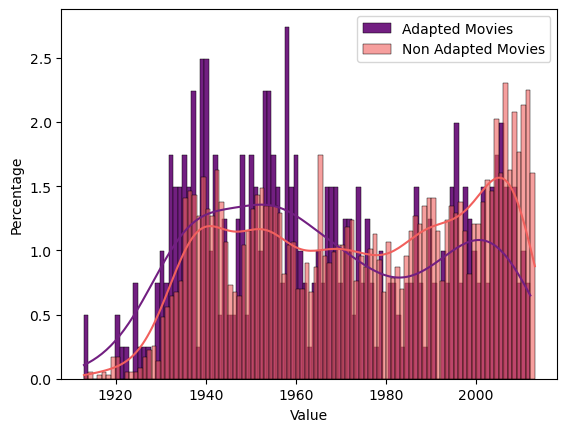

In [14]:
palette = sns.color_palette("magma", n_colors=2)  # Choose a palette
sns.histplot(evolution_adapt['Action & Adventure'], stat='percent', bins=100, color=palette[0], label='Adapted Movies', kde=True, alpha=1)
sns.histplot(evolution_non_adapt['Action & Adventure'], stat='percent', bins=100, color=palette[1], label='Non Adapted Movies', kde=True, alpha=0.6)

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('')
plt.legend()

# Show the plot
plt.show()